<img src="https://3.bp.blogspot.com/-PdlI35ATvOM/VvPgWFJZ4OI/AAAAAAAAAlo/RC30tdqcvv0TxOFUDmk4cMYujoQxeGmlw/s1600/inpe.jpg" align="right" width="150" />


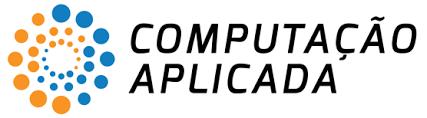


## Felipe Carvalho

Disciplina: Princípios e Aplicações de Mineração de Dados

<br>

<hr style="border: 1px solid #0984e3;">


 ## Sumário
 
- [Introdução](#Introdução)

- [Materiais e Métodos](#Materiais-e-Métodos)
    - [Área de Estudo](#Área-de-Estudo)
    - [Dados](#Dados)
- [Desenvolvimento](#Desenvolvimento)
    - [Análise Exploratória de Dados](#Análise-Exploratória-de-Dados)
    - [Seleção de amostras](#Seleção-de-amostras)
    - [Modelos de classificação](#Modelos-de-classificação)
    - [Avaliação dos Modelos](#Avaliação-dos-Modelos)
- [Conclusão](#Conclusão)
- [Referências](#Referências)


## Etapas
 - [x] Extração das séries temporais 
 - [x] Pré-processamento de dados
 - [x] Análise exploratória
 - [x] Aplicação do algoritmo SOM (self-organizing map)
 
## TODOs
 - [x] Remover os warnings de importação
 - [x] Customizar o jupyter
 - [x] Descrever os dados (artigo)
 - [x] Melhorar a estrutura do notebook
 - [ ] Revisar o texto

<hr style="border: 3px solid #0984e3;">


# Introdução

Em consequência do crescimento populacional e de mudanças climáticas o monitoramento de mudança de cobertura do solo é fundamental para assegurar a qualidade do meio ambiente e melhorar a gestão de recursos naturais [1]. Aplicações de monitoramento do solo requerem observações frequentes, como fenologia da vegetação, resposta a desastres e qualidade da água [2].

Com as recentes polı́ticas de dados abertos de agências governamentais e espaciais ampliou-se a facilidade de aquisição de imagens de observação da terra em grande volume e frequência, provindos de diferentes satélites, como Landsat-8, Sentinel-2 e CBERS. Assim, torna-se cada vez mais necessária a extração de informações dessa ampla massa de imagens, no entanto, imagens oriundas de satélites possuem caracterı́sticas que dificultam sua manipulação, por exemplo bandas com diferentes resoluções espaciais, séries temporais irregulares e projeções cartográficas desiguais em cada parte do mundo.

Uma forma de solucionar as complexidades apresentadas anteriormente, é o uso de um cubo de dados de observação da terra, o qual possui uma interface simples e intuitiva, com o objetivo de proporcionar uma estrutura de dados organizada para o usuário final [3]. [4] define cubo de dados como uma matriz de quatro dimensões X (longitude), Y (latitude), tempo, e as bandas do produto. Diversos trabalhos usam cubos de dados para realizar o monitoramento de cobertura do solo [5] e [6].

Posto que avanços científicos têm se realizado com uso do cubo de dados, o objetivo deste trabalho é avaliar as amostras de cobertura e uso do solo fornecidas por voluntários com o uso de imagens de baixa resolução e do algoritmo de mapas auto-organizáveis (SOM, do inglês \textit{Self-Organizing Maps}).

<hr style="border: 3px solid #0984e3;">

# Materiais e Métodos

<hr style="border: 0.5px solid #0984e3;">

Para realizar a seleção de amostras utilizou-se a metodologia proposta por Santos et al. [6] com base no algoritmo SOM, na qual um *cluster* é formado por um ou mais neurônios que pertencem à mesma classe. Os neurônios são rotulados mediante a técnica de voto majoritário, onde é definido à priori um limiar de probabilidade para alterar o rótulo de cada neurônio. Desta forma, caso o neurônio não possua amostras mapeadas, atribui-se o rótulo de ``NoClass``. Para verificar a metodologia supracitada, criou-se duas séries temporais, referidas neste trabalho como ``selecionadas`` e ``originais``. Assim, cada série foi classificada em três algoritmos: *k-nearest neighbors* (KNN), Árvore de Decisão e Redes Neurais de Multicamadas, de forma a comparar os resultados apresentados pelos modelos. 

Os algoritmos utilizados neste trabalho foram implementados pela linguagem de programação R. O pacote *Kohonen* [7] foi usado para treinar o SOM, e para realizar a seleção de amostras e extração das séries temporais no cubo de dados foi usado o pacote SITS [8]. Por fim, para implementar os classificadores foram utilizados os pacotes [*Caret*](https://cran.r-project.org/web/packages/caret/caret.pdf), [*rpart*](https://cran.r-project.org/web/packages/rpart/rpart.pdf) e [*Keras*](https://cran.r-project.org/web/packages/keras/keras.pdf). 

<hr style="border: 0.5px solid #0984e3;">

## Área de Estudo

A área de estudo apresentada na Figura 1 compreende os estados do norte, nordeste e centro-oeste do Brasil, localizados na região da Amazônia Legal. A região de estudo foi escolhida com base no conjunto de 6335 amostras coletadas na plataforma *Open Street Map*, com as seguintes classes: Floresta, Pastagem e Cultura permanente. A paleta de cores foi definida manualmente, de forma que, as classes mais parecidas espectralmente compreendam cores mais próximas, assim, segundo o Manual Técnico de Uso da Terra [9] formam-se dois grupos: Áreas de Vegetação Natural (Floresta) e Área Antrópicas Agrícolas (Pastagem e Cultura Permanente).

 <figure>
  <img src="img/map_lul.jpeg" alt="logo">
  <figcaption> Figura 1: Localização da área de estudo</figcaption>
</figure> 

<hr style="border: 0.5px solid #0984e3;">

## Dados

Os dados usados neste estudo foram extraídos do sensor MODIS (*The Terra Moderate Resolution Imaging Spectroradiometer*) a bordo do satélite Terra desenvolvido pela [NASA](https://terra.nasa.gov/about/terra-instruments/modis). O produto MOD13Q1 possui a resolução espacial de 250m, gera duas bandas de vegetação primária com período de revisita de 16 dias. Para nosso estudo, as séries temporais correspondem a valores medidos em cada revisita, obtidos em pixels diferentes, usando o Índice de Vegetação por Diferença Normalizada (NDVI, do inglês *normalized difference vegetation index*) e o Índice de Realce da Vegetação (EVI, do inglês *Enhanced Vegetation Index*).

<br/>
<hr style="border: 3px solid #0984e3;">

# Desenvolvimento

<hr style="border: 0.5px solid #0984e3;">

## Análise Exploratória de Dados

#### Definição das funções utilitárias

In [118]:
#' @title Adição de novos modelos do SOM
#' @name add_row_som
#' @author Felipe Carvalho, \email{felipe.carvalho@@inpe.br}
#' 
#' @description Cria um tibble com as informações de cada modelo
#'
#' @param som_df    Tibble com a estrutura a ser seguida
#' @param som_model List com os modelos utilizados 
#' @param class     Vetor com as classes dos dados
#'
#' @return Tibble com as informações dos modelos utilizados
add_row_som <- function(som_df, som_model_list, class = NULL){
  
  for(index in 1:nrow(som_model_list)){
    som_df <- som_df %>% 
      dplyr::add_row(quantisation_error_ndvi = c(as.vector(som_model_list[index,]$som[[1]]$changes[,1])),
                     quantisation_error_evi = c(as.vector(som_model_list[index,]$som[[1]]$changes[,2])),
                     iterations = c(1:nrow(som_model_list[index,]$som[[1]]$changes)),
                     grid = c(paste0(som_model_list[index,]$som[[1]]$grid$xdim, "x", som_model_list[index,]$som[[1]]$grid$ydim)),
                     mode = som_model_list[index,]$mode,
                     error_min_ndvi = min(som_model_list[index,]$som[[1]]$changes[2:nrow(som_model_list[index,]$som[[1]]$changes),1]),
                     error_min_evi = min(som_model_list[index,]$som[[1]]$changes[2:nrow(som_model_list[index,]$som[[1]]$changes),2]))
  }
  return(som_df)
} 

#' @title Função para criar o modelo de dados para a visualização
#' @name sits_som_plot_utils
#' @author Lorena Alves,    \email{lorena.santos@@inpe.br} 
#' @author Felipe Carvalho, \email{felipe.carvalho@@inpe.br}
#' 
#' @description Correção do nome das classes e grupos
#'
#' @param sits_evaluate Tibble com as informações de classes e grupos do SOM
#'
#' @return Modelo com as informações de classe e grupo corrigidos
sits_som_plot_utils <- function(sits_evaluate){
    
    
    # Criação de um tibble com as informações de cada modelo
    data <- tibble::tibble(mixture_percentage = c(data$mixture_cluster$mixture_percentage),
                           original_class = c(data$mixture_cluster$original_class),
                           cluster = c(data$mixture_cluster$cluster)) 
    
    # Correção do nome de cada classe
    data$original_class <- dplyr::recode(data$original_class, "forest" = "Floresta",
                                         "pasture" = "Pastagem",
                                         "permanent_crop" = "Cultura Permanente")
    # Correção do nome de cada cluster
    data$cluster <- dplyr::recode(data$cluster, "forest" = "Floresta",
                                  "pasture" = "Pastagem",
                                  "permanent_crop" = "Cultura Permanente")
    
    # Transformando os dados categóricos em fatores
    data <- data %>%
        dplyr::mutate(original_class = factor(original_class, levels = c("Floresta",
                                                                         "Pastagem",
                                                                         "Cultura Permanente"))) %>%
        dplyr::mutate(cluster = factor(cluster, levels = c("Floresta",
                                                           "Pastagem",
                                                           "Cultura Permanente")))
    
    return(data)
}


#' @title Visualização da confusão entre grupos
#' @name sits_som_plot_clusters
#' @author Lorena Santos
#' 
#' @description Visualização da confusão entre grupos do SOM
#'
#' @param sits_evaluate Tibble com as informações de classes e grupos do SOM
#'
#' @return Objeto do pacote ggplot2 
sits_som_plot_clusters <- function(sits_evaluate){
    
    # Criação do modelo de dados utilizado
    data_model <- sits_som_plot_utils(data)
    
    som_cluster_viz <-
        ggplot2::ggplot() + ggplot2::geom_bar(
            ggplot2::aes(
                y = mixture_percentage,
                x = cluster,
                fill = original_class),
            data = data_model,
            stat = "identity",
            position = ggplot2::position_dodge()) +
        cowplot:: theme_minimal_hgrid(12) +
        ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 0, hjust = 1)) +
        ggplot2::labs(x = "Classes", y = "Porcentagem de confusão (%)",
                      title = "Confusão entre grupos") +
        scale_fill_manual(name = "grupos: ",
                          labels = c("Floresta",
                                     "Pastagem",
                                     "Cultura Permanente"),
                          values = c("#33a02c",
                                     "#d95f02",
                                     "#ffff99")) +
        theme(
            plot.title = element_text(size = 18,
                                      hjust= 0.5),
            axis.title.x = element_text(hjust=0.5),
            axis.text.x = element_text(hjust=0.5)) +
        scale_y_continuous(limits = c(0,100))
  
  return(som_cluster_viz)
}

#' @title Use time series values as distances for training patterns
#' @name sits_distances
#' @author Rolf Simoes, \email{rolf.simoes@@inpe.br}
#' @author Gilberto Camara, \email{gilberto.camara@@inpe.br}
#'
#' @description This function allows using a set of labelled time series as
#' input to the machine learning models. The attributes used to train the model
#' are the series themselves. It extracts the time series from a sits tibble
#' and "spreads" them in time to produce a tibble with distances.
#'
#' @param  data       A tibble with time series data and metadata.
#' @return            A data.table where columns have the reference label
#'                    and the time series values as distances.
sits_distances <- function(data) {

    n_rows_data <- nrow(data)

    # create a list with the time series transposed from columns to rows
    ts.lst <- data$time_series %>%
        purrr::map(function(ts){
            as.data.frame(t(unlist(ts[-1])))
        })
    # bind the lists of time series together
    dist_DT <- data.table::rbindlist(ts.lst, use.names = FALSE)
    # create a data frame with the first two columns for training
    distances_DT <- data.table::data.table("original_row" = 1:n_rows_data,
                                           "reference" = data$label)
    # join the two references columns with the data values
    distances_DT <- data.table::as.data.table(cbind(distances_DT, dist_DT))

    return(distances_DT)
}


#' @title Visualização da acurácia de cada K do KNN
#' @name plot_knn
#' @author Felipe Carvalho, \email{felipe.carvalho@@inpe.br}
#' 
#' @description Visualização da acurácia de cada K do algoritmo
#' KNN
#'
#' @param knn_model Modelo do KNN, objeto do pacote caret
#' @param title     Título do modelo 
#'
#' @return Objeto ggplot2
plot_knn <- function(knn_model, title){
    
    ggplot(knn_model, aes(x = k, y = valor, color = medidas)) +
    geom_line() +
    theme_bw() + 
    facet_grid(~medidas, space = "free_y", scales = "free") + 
    geom_hline(yintercept=knn_model$max_acc, color = "black", size=0.5) + 
    theme(
        axis.text.x = element_text(angle = 0,
                                   color = "black",
                                   size  = 17),
        axis.title.x = element_text(margin = margin(t = 7),
                                    size=17),
        plot.title = element_text(size = 14,
                                  hjust= 0.5,
                                  margin = margin(b = 7)),
        axis.text.y = element_text(size = 14, color="black"),
        axis.title.y = element_text(size = 14),
        legend.key.size = unit(1.2, "lines"),
        legend.spacing = unit(0.1, "cm"),
        legend.text = element_text(size = 18),
        legend.title = element_text(size = 15),
        strip.text.x = element_text(size = 14, colour = "black"),
        strip.text.y = element_text(size = 14, colour = "black")) + 
    labs(x      = "#Vizinhos",
         y      = "Acurácia", 
         title = title)
}




#' @title cm_plot
#' @description Método para a visualização da matriz de 
#' confusão
#' @author Felipe Carvalho
#'
#' @param cm         Matriz de confusao, objeto do pacote caret
#' @param model_type Título do modelo 
#'
#' @return Visualização da matriz de confusão 
cm_plot <- function(cm, model_type = "Default"){
    
    cm_viz <-
        ggplot(data = as.data.frame(cm$table) ,
               aes(x = Prediction,y = Reference)) +
    geom_tile(aes(fill = log(Freq)), colour = "white") +
    geom_text(aes(x = Prediction, y = Reference, label = Freq), size = 8) +
    labs(x = "Referência",
         y = "Predição",
         title= paste("Matriz de confusão - ", model_type)) + 
    theme_classic() + 
    theme(
        axis.text.x = element_text(angle = 0, 
                                   color = "black",
                                   size  = 17),
        axis.title.x = element_text(margin = margin(t = 7),
                                    size=17),
        plot.title = element_text(size = 14,
                                  hjust= 0.5,
                                  margin = margin(b = 7)),
        axis.text.y = element_text(size = 14, color="black"),
        axis.title.y = element_text(size = 14))
  
    return(cm_viz)
}

#### Importações dos pacotes 

In [121]:
suppressMessages(library(dplyr))      # Conjunto de funções para manipulação de dados
suppressMessages(library(magrittr))   # Operador pipe
suppressMessages(library(plyr))       # Ferramentas para divisão, aplicação e combinação de dados
suppressMessages(library(tibble))     # Criação de Data Frame  
suppressMessages(library(cowplot))    # Temas de visualização do pacote ggplot2
suppressMessages(library(ggplot2))    # Visualização de dados
suppressMessages(library(sits))       # Conjunto de métodos para classificação e agrupamento de séries temporais
suppressMessages(library(kohonen))    # Criação de Mapas Auto-organizaveis de Kohonen
suppressMessages(library(lubridate))  # Manipulação de datas
suppressMessages(library(scales))     # Manipulação de datas
suppressMessages(library(keras))      # Framework para criar e treinar redes neurais
suppressMessages(library(caret))      # Métodos de classificação e regressão
suppressMessages(library(gridExtra))  # Visualização em grade para objetos do pacote ggplot2
suppressMessages(library(rpart))      # Criação de árvores de decisão e florestas aleatórias
suppressMessages(library(rpart.plot)) # Métodos de visualização de árvores de decisão

set.seed(123)              # Uso da semente para garantir reprodutibilidade
theme_set(theme_cowplot()) # Definição do tema de visualização

**Obs.:** Para instalar o SITS, use `devtools::install_github("oldlipe/sits")`, pois algumas modificações foram adicionadas.

#### Leitura dos dados

In [165]:
load("./data/selecao_final_dataset_20190301_20191116.RData")
#load("./data/sits_clean_som_20_20_batch.RData") - Para não treinar os modelos SOM novamente

#### Visualização dos dados e seus respectivos tipos

In [167]:
tibble::glimpse(timeseries_forest_select)

Observations: 2,991
Variables: 7
$ longitude   <dbl> -55.72704, -55.72563, -55.72552, -55.76223, -55.75615, -5…
$ latitude    <dbl> -15.47882, -15.47967, -15.47991, -15.48870, -15.48907, -1…
$ start_date  <date> 2019-03-01, 2019-03-01, 2019-03-01, 2019-03-01, 2019-03-…
$ end_date    <date> 2019-11-16, 2019-11-16, 2019-11-16, 2019-11-16, 2019-11-…
$ label       <chr> "forest", "forest", "forest", "forest", "forest", "forest…
$ cube        <chr> "MOD13Q1", "MOD13Q1", "MOD13Q1", "MOD13Q1", "MOD13Q1", "M…
$ time_series <list> [<tbl_df[14 x 3]>, <tbl_df[14 x 3]>, <tbl_df[14 x 3]>, <…


#### Descrição:
<br/>

- **longitude**: Coordenada geográfica referente à longitude
- **latitude**: Coordenada geográfica referente à latitude
- **start_date**: Data inicial da série temporal
- **end_date**: Data final da série temporal
- **label**: As classes das amostras coletadas:
    - Cultura Permanente
    - Floresta
    - Pastagem
- **cube**: Produto/Sensor da fonte dos dados
- **time_series**: Série temporal pertencente as amostras coletadas;
    - Index: Data de coleta em (%Y-%m-%d)
    - Bandas: Respectivas bandas do produto a bordo do satélite em uso 

**Qual classe possui mais observações?**

In [124]:
timeseries_forest_select %>% 
    dplyr::group_by(label) %>% 
    dplyr::count() %>% 
    dplyr::arrange(desc(n))

label,n
pasture,1251
permanent_crop,897
forest,843


<br>

Como apresentado acima, a classe com a maior quatidade de amostras é a **Pastagem**. A célula abaixo apresenta a série temporal da primeira amostra do conjunto de dados:

In [125]:
head(timeseries_forest_select$time_series[[1]])

Index,ndvi,evi
2019-03-06,0.7223,0.3833
2019-03-22,0.6357,0.3404
2019-04-07,0.7036,0.4799
2019-04-23,0.7206,0.3960
2019-05-09,0.8160,0.4857
2019-05-25,0.7721,0.4185


<br>

A célula abaixo apresenta o resumo estatístico das bandas:

In [126]:
timeseries_forest_select %>%
    tidyr::unnest(time_series) %>% 
    dplyr::select(Index:evi) %>%
    summary()

     Index                 ndvi              evi         
 Min.   :2019-03-06   Min.   :-0.0688   Min.   :-0.0137  
 1st Qu.:2019-04-23   1st Qu.: 0.5071   1st Qu.: 0.2741  
 Median :2019-06-18   Median : 0.6877   Median : 0.3929  
 Mean   :2019-06-18   Mean   : 0.6429   Mean   : 0.3957  
 3rd Qu.:2019-08-13   3rd Qu.: 0.7994   3rd Qu.: 0.5172  
 Max.   :2019-09-30   Max.   : 0.9988   Max.   : 0.9767  

É possível observar que o conjunto de dados não possui valores **NA**. A célula abaixo apresenta em forma de coordenadas paralelas as séries temporais utilizadas.

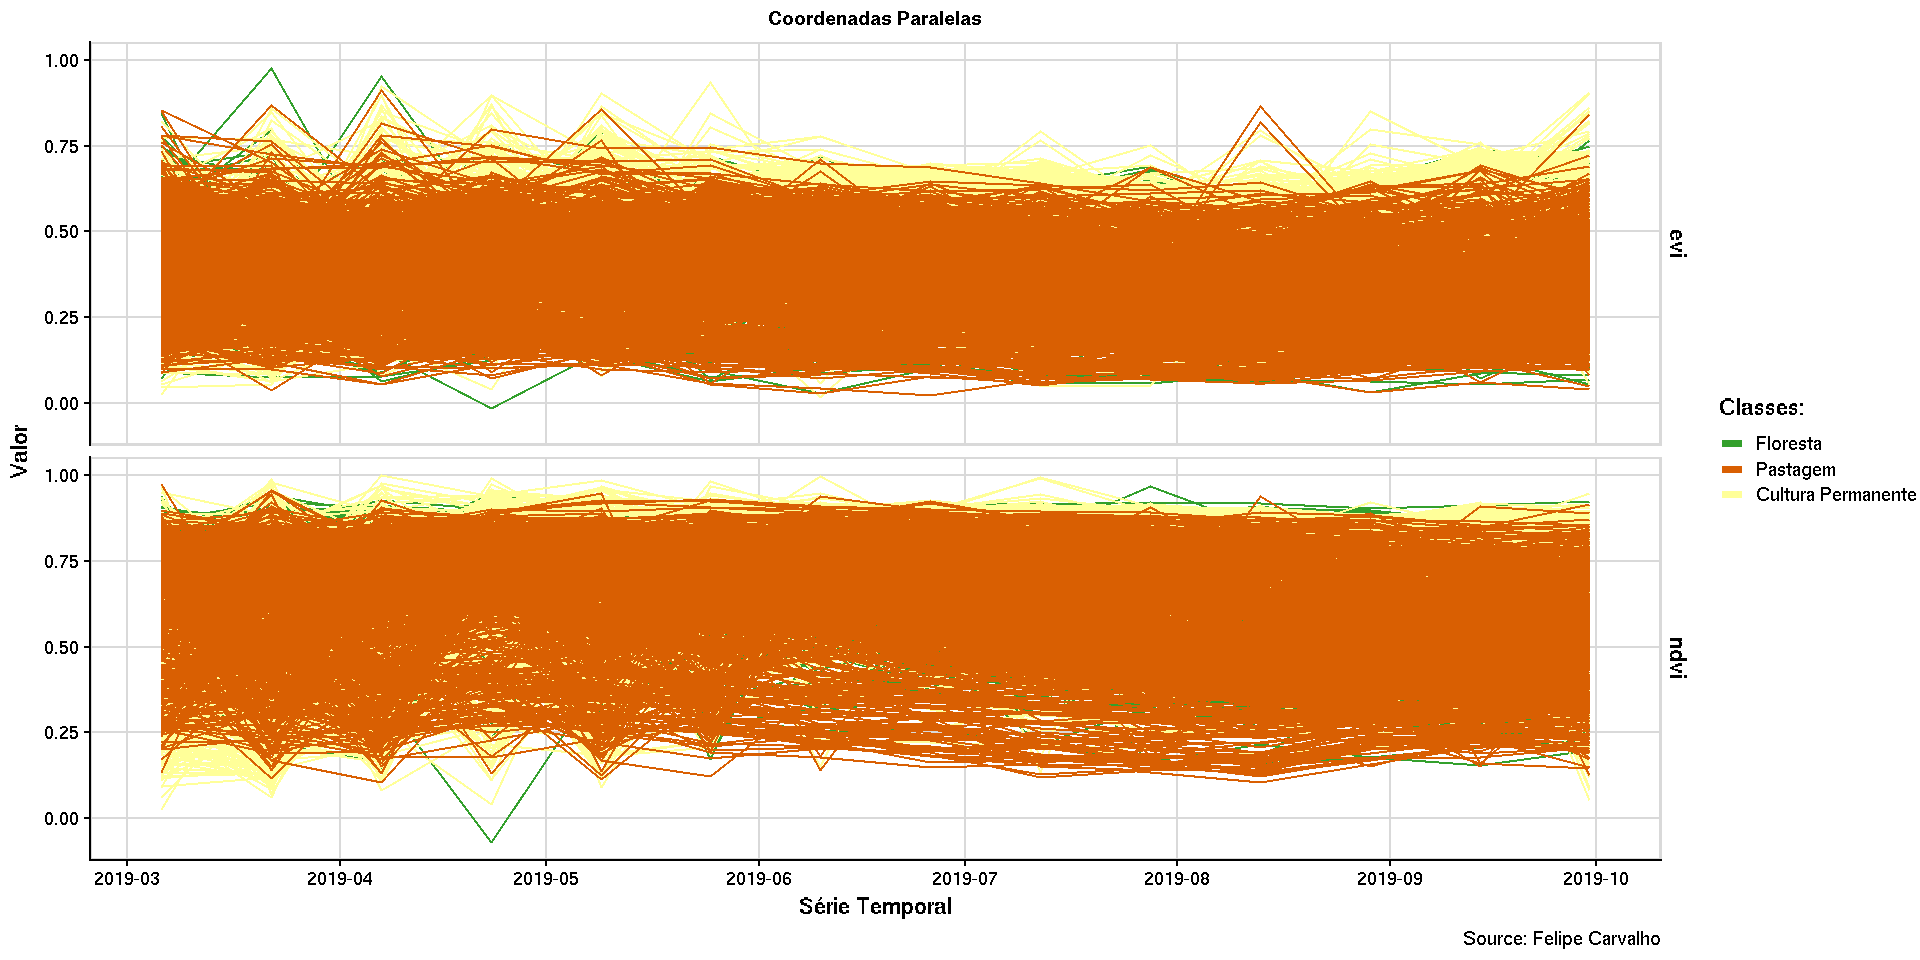

In [127]:
options(repr.plot.width=16, repr.plot.height=8)

timeseries_forest_select %>%
    dplyr::mutate(id = 1:nrow(timeseries_forest_select)) %>%
    tidyr::unnest(time_series) %>%
    tidyr::gather(indice, valor, -longitude:-Index, -id) %>%
    ggplot(aes(x=Index, y=valor, group=id, colour=label)) +
        geom_line() +
        facet_grid(indice ~ .) + 
  labs(title="Coordenadas Paralelas",
       caption="Source: Felipe Carvalho",
       y=expression("Valor"),
       x="Série Temporal") +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  theme(strip.text.x = element_text(size = 14, colour = "black"),
        strip.text.y = element_text(size = 14, colour = "black"),
        plot.title = element_text(size = 12,
                                  hjust= 0.5,
                                  margin = margin(b = 7)),
        strip.background = element_blank(),
        legend.position="right",
        legend.text = element_text(size = 11)) +
    guides(colour = guide_legend(nrow = 3, override.aes = list(size = 2))) +
    scale_color_manual(name = "Classes: ",
                      labels = c("Floresta",
                                 "Pastagem",
                                 "Cultura Permanente"),
                      values = c("#33a02c",
                                 "#d95f02",
                                 "#ffff99")) + 
    background_grid(minor = 'none') +
    panel_border()

A célula acima apresenta em forma de coordenadas paralelas as séries temporais extraídas do conjunto de imagens correspondentes ao período de março de 2019 a outubro de 2019. É possível observar a sobreposição de linhas entre as classes e alguns padrões temporais. Assim, a sobreposição de linhas e similiridade espectral entre as classes dificulta a interpretação do gráfico. 

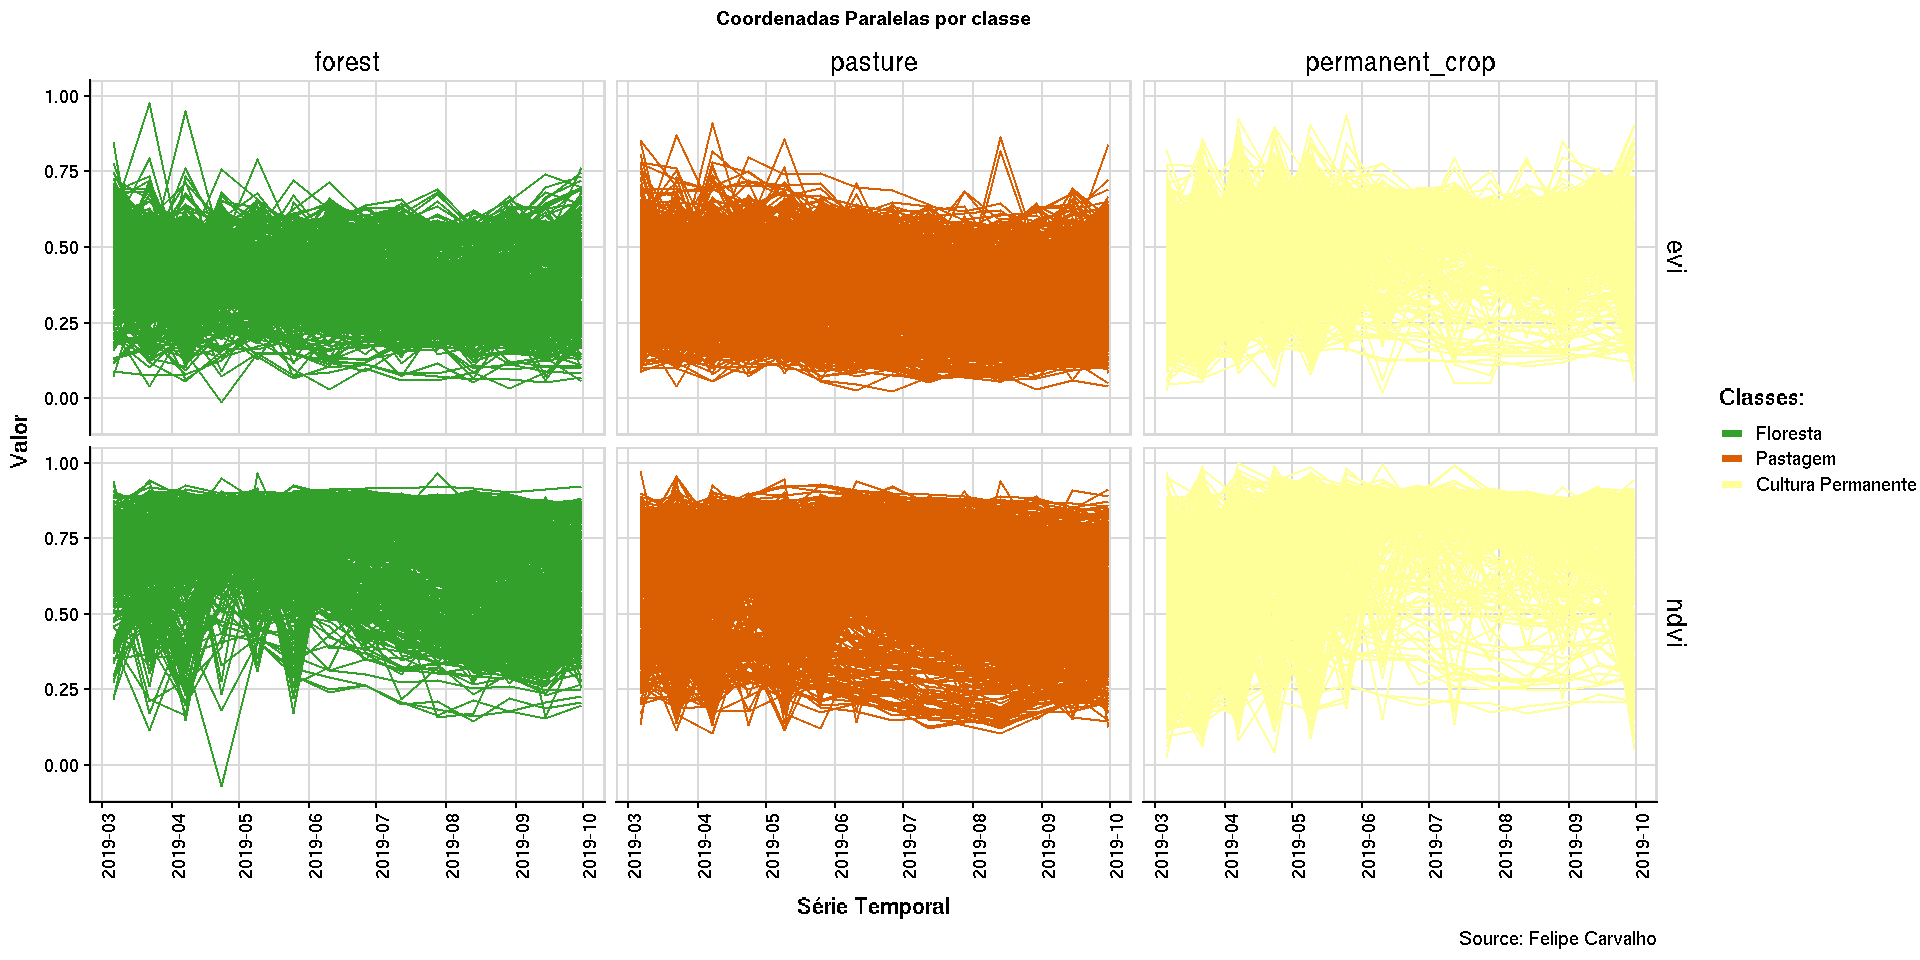

In [128]:
options(repr.plot.width=16, repr.plot.height=8)

timeseries_forest_select %>%
    dplyr::mutate(id = 1:nrow(timeseries_forest_select)) %>%
    tidyr::unnest(time_series) %>%
    tidyr::gather(indice, valor, -longitude:-Index, -id) %>%
    ggplot(aes(x=Index, y=valor, group=id, colour=label)) +
        geom_line() +
        facet_grid(indice ~ label) + 
  labs(title="Coordenadas Paralelas por classe",
       caption="Source: Felipe Carvalho",
       y=expression("Valor"),
       x="Série Temporal") +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  theme(strip.text.x = element_text(size = 16, colour = "black"),
        strip.text.y = element_text(size = 16, colour = "black"),
        plot.title = element_text(size = 12,
                                  hjust= 0.5,
                                  margin = margin(b = 7)),
        axis.text.x = element_text(angle = 90,
                                   hjust=-0.5),
        strip.background = element_blank(),
        legend.position="right",
        legend.text = element_text(size = 11)) +
    guides(colour = guide_legend(nrow = 3, override.aes = list(size = 2))) +
    scale_color_manual(name = "Classes: ",
                      labels = c("Floresta",
                                 "Pastagem",
                                 "Cultura Permanente"),
                      values = c("#33a02c",
                                 "#d95f02",
                                 "#ffff99")) + 
    background_grid(minor = 'none') +
    panel_border()

## Seleção de amostras

<hr style="border: 0.5px solid #0984e3;">

#### Treino dos modelos SOM com grade 10x10


In [ ]:
# Treinamento da rede 10x10 em batch
sits_som_10_10_batch <- sits::sits_som_map(data = timeseries_forest_select,
                                           grid_xdim = 10,
                                           grid_ydim = 10,
                                           alpha = 0.05,
                                           iterations = 2,
                                           radius = quantile(grid_xdim*grid_ydim, 2/3),
                                           cores = 7,
                                           mode = "pbatch",
                                           n_it_median = 1000)

# Treinamento da rede 10x10 online
sits_som_10_10_online <- sits::sits_som_map(data = timeseries_forest_select,
                                            grid_xdim = 10,
                                            grid_ydim = 10,
                                            alpha = 0.05,
                                            iterations = 2,
                                            radius = quantile(grid_xdim*grid_ydim, 2/3),
                                            cores = -1,
                                            mode = "online",
                                            n_it_median = 1000)

# Seleção dos modelos
model_som_10_10_batch <- sits_som_10_10_batch$som_properties
model_som_10_10_online <- sits_som_10_10_online$som_properties

#### Treino dos modelos SOM com grade 15x15

In [7]:
# Treinamento da rede 15x15 em batch
sits_som_15_15_batch <- sits::sits_som_map(data = timeseries_forest_select,
                                           grid_xdim = 15,
                                           grid_ydim = 15,
                                           alpha = 0.05,
                                           iterations = 2,
                                           radius = quantile(grid_xdim*grid_ydim, 2/3),
                                           cores = 7,
                                           mode = "pbatch",
                                           n_it_median = 1000)

# Treinamento da rede 15x15 online
sits_som_15_15_online <- sits::sits_som_map(data = timeseries_forest_select,
                                            grid_xdim = 15,
                                            grid_ydim = 15,
                                            alpha = 0.05,
                                            iterations = 2,
                                            radius = quantile(grid_xdim*grid_ydim, 2/3),
                                            cores = -1,
                                            mode = "online",
                                            n_it_median = 1000)

# Seleção dos modelos
model_som_15_15_batch <- sits_som_15_15_batch$som_properties
model_som_15_15_online <- sits_som_15_15_online$som_properties

#### Treino dos modelos SOM com grade 20x20

In [8]:
# Treinamento da rede 20x20 batch
sits_som_20_20_batch <- sits::sits_som_map(data = timeseries_forest_select,
                                           grid_xdim = 20,
                                           grid_ydim = 20,
                                           alpha = 0.05,
                                           iterations = 2,
                                           radius = quantile(grid_xdim*grid_ydim, 2/3),
                                           cores = 3,
                                           mode = "pbatch",
                                           n_it_median = 1000)

# Treinamento da rede 20x20 online
sits_som_20_20_online <- sits::sits_som_map(data = timeseries_forest_select,
                                            grid_xdim = 20,
                                            grid_ydim = 20,
                                            alpha = 0.05,
                                            iterations = 2,
                                            radius = quantile(grid_xdim*grid_ydim, 2/3),
                                            cores = -1,
                                            mode = "online",
                                            n_it_median = 1000)
# Seleção do modelos
model_som_20_20_batch <- sits_som_20_20_batch$som_properties
model_som_20_20_online <- sits_som_20_20_online$som_properties

#### Visualização dos erros de quantização

In [11]:
# Criação de um tibble com as informações da rede SOM
model_df <- tibble::tibble(quantisation_error_ndvi = c(as.vector(model_som_10_10_online$changes[,1])),
                           quantisation_error_evi = c(as.vector(model_som_10_10_online$changes[,2])),
                           iterations = c(1:nrow(model_som_10_10_online$changes)),
                           grid = c("10x10"),
                           mode = c("online"),
                           error_min_ndvi = min(model_som_10_10_online$changes[2:nrow(model_som_10_10_online$changes),1]),
                           error_min_evi = min(model_som_10_10_online$changes[2:nrow(model_som_10_10_online$changes), 2]))

# Adição dos modelos em uma lista
som_models <- tibble::tibble(som = list(model_som_10_10_batch), mode = c("batch")) %>%
 tibble::add_row(
     som = list(model_som_15_15_online, model_som_15_15_batch, sits_som_20_20_online, model_som_20_20_batch),
     mode = c("online", "batch", "online", "batch"))

# Adição das informações de cada modelo 
model_df <- model_df %>%
    add_row_som(som_model_list = som_models, class = timeseries_forest_select$label)

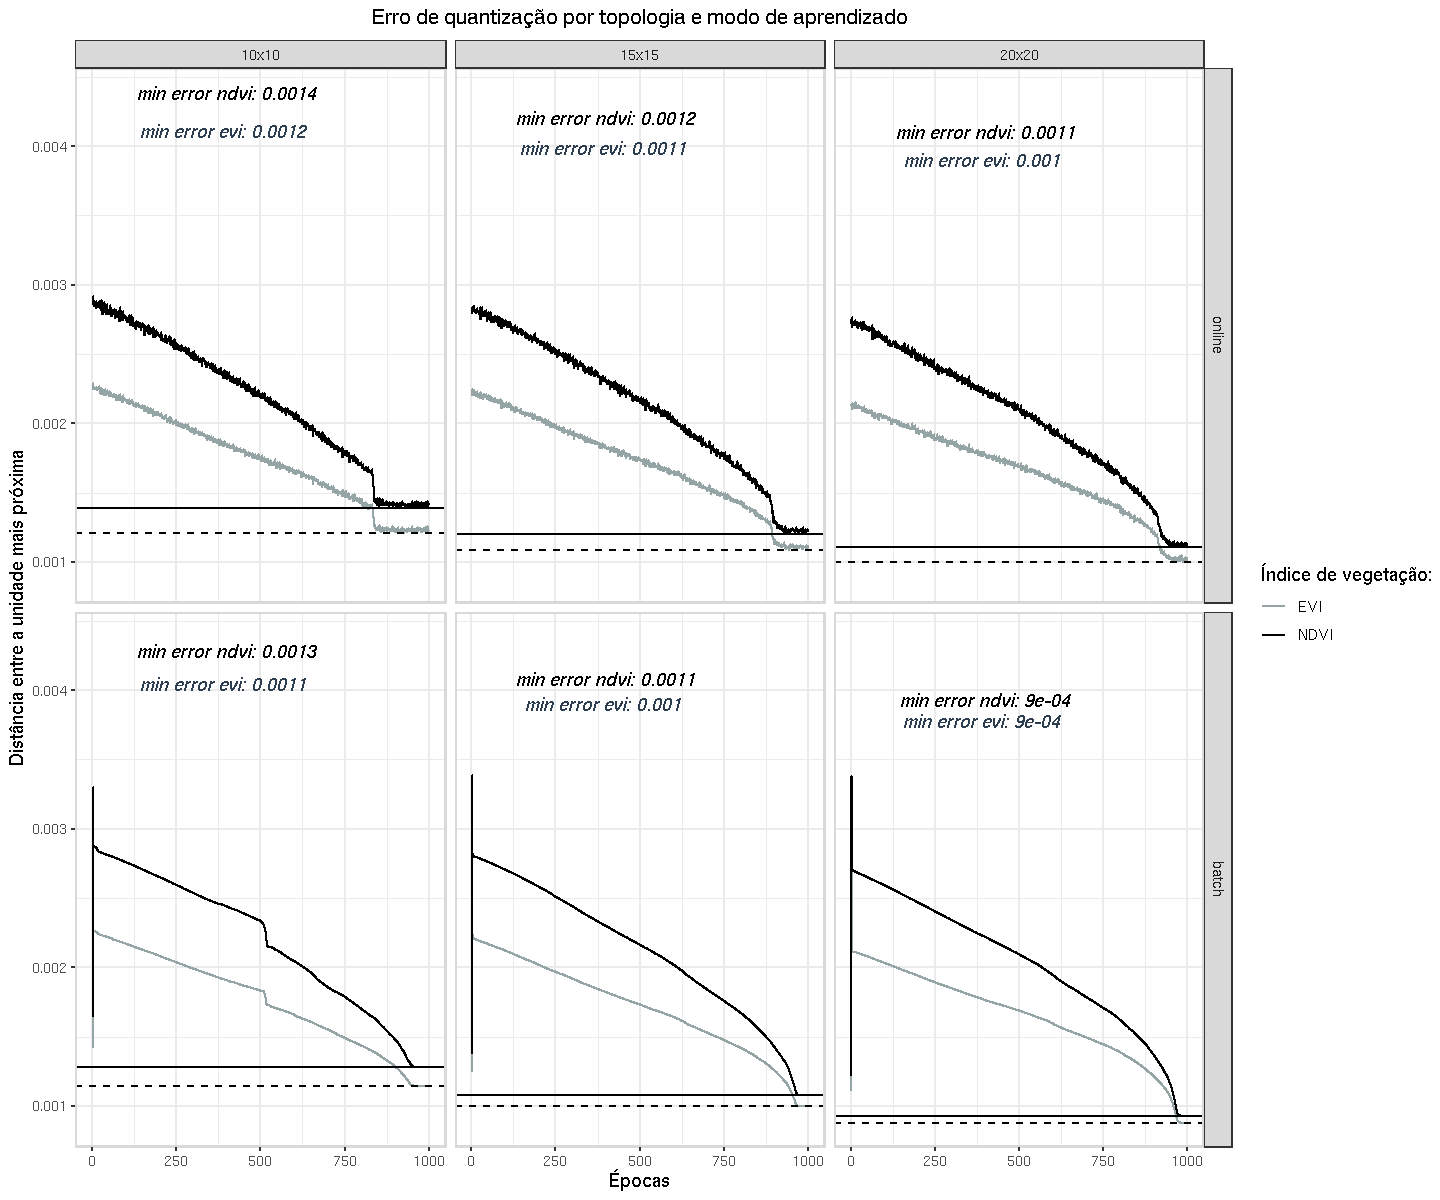

In [15]:
options(repr.plot.width=12, repr.plot.height=10)

# Visualização do erro de quantização dos modelos criados
model_df %>%
    dplyr::mutate(grid = factor(grid, levels = c("10x10", "15x15", "20x20")),
                  mode = factor(mode, levels=c("online", "batch"))) %>%
    tidyr::gather(atributo, valores, -iterations, -grid, -mode, -error_min_evi, -error_min_ndvi) %>%
    ggplot(aes(x = iterations, y = valores, color = atributo)) +
        geom_line() + 
        facet_grid(mode ~ grid) + 
        labs(x = "Épocas",
             y = "Distância entre a unidade mais próxima",
             title="Erro de quantização por topologia e modo de aprendizado")  + 
    geom_hline(aes(yintercept=error_min_evi), linetype="dashed", color = "black") + 
    geom_hline(aes(yintercept=error_min_ndvi), linetype="solid", color = "black") + 
    geom_text(aes(x = 400,
                  y = error_min_ndvi+0.003,
                  label = paste("min error ndvi:",round(error_min_ndvi, 4)),
                  fontface = "italic"),
              check_overlap = TRUE,
              show.legend = FALSE,
              colour="black",
              size = 4) +
    geom_text(aes(x = 390,
                  y = error_min_evi+0.0029,
                  label = paste("min error evi:",round(error_min_evi, 4)),
                  fontface = "italic"),
              check_overlap = TRUE,
              show.legend = FALSE,
              colour="#2c3e50",
              size = 4) +
    scale_color_manual(name = "Índice de vegetação: ",
                       labels = c("EVI", "NDVI"),
                       values = c("#95a5a6", "#000000")) +
    background_grid(minor = 'none') + 
    theme_bw() + 
    panel_border() + 
    theme(plot.title = element_text(hjust= 0.5,margin = margin(b = 7)))

Com o objetivo de obter grupos homogêneos no agrupamento, várias configurações do SOM foram geradas, sendo elas: topologia retangular e variações de 10x10, 15x15 e 20x20 na grade de neurônios, $\eta$ (taxa de aprendizado) 0.05 e o raio de vizinhança de $\frac{2}{3}$ em relação a quantidade total de neurônios. Os resultados são apresentados acima, nos quais são apresentados os erros de quantização das topologias supracitadas, onde cada grade possui duas séries temporais, NDVI e EVI, respectivamente. O erro de quantização mostra a distância mínima entre os vetores de entrada e seus respectivos BMUs por época. Em cada topologia avaliada, utilizou-se dois métodos de treinamento: *online* e *batch*. O aprendizado em *batch* refere-se ao uso de um conjunto de padrões na fase de aprendizado, diferentemente, o aprendizado *online* contempla apenas uma observação por iteração. Assim, a topologia com o menor erro de quantização foi de 20x20 treinada em modo *batch*.

#### Seleção de amostras

In [16]:
# Extração de métricas sobre os clusters, calculando a percentagem de mistura entre um cluster e outros
sits_evaluate_20_20_batch <- sits::sits_som_evaluate_cluster(sits_som_20_20_batch)

# Seleção de um novo subconjunto de amostras avaliadas pelos métodos de agrupamento da SOM
sits_clean_som_20_20_batch <- sits::sits_som_clean_samples(sits_som_20_20_batch,
                                                           prob_label_change = 0.8,
                                                           min_cluster_prob = 0.6)

#### Visualização da confusão entre grupos

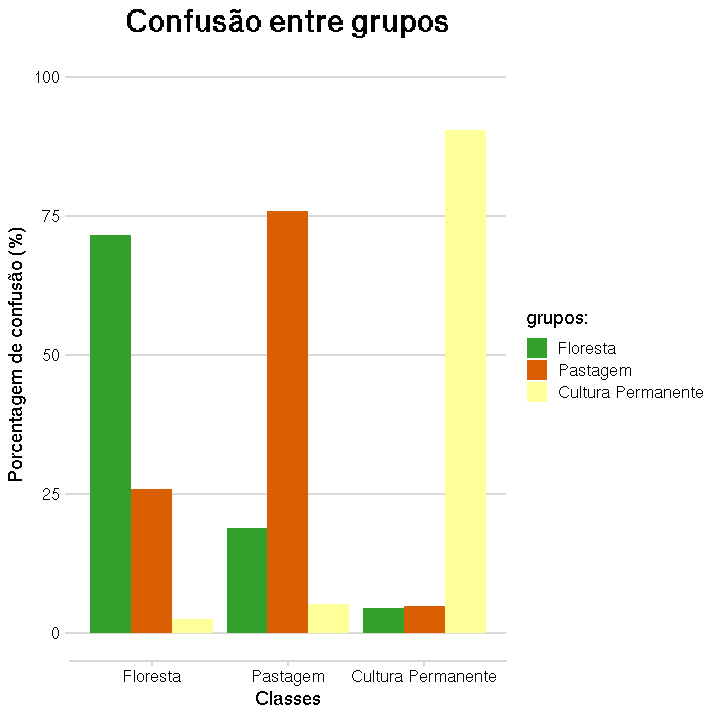

In [24]:
options(repr.plot.width=6, repr.plot.height=6)
sits_som_plot_clusters(sits_evaluate_20_20_batch)

In [33]:
cat("Tamanho série temporal original:   ", nrow(timeseries_forest_select))
cat("\n")
cat("Tamanho série temporal após a seleção:", nrow(sits_clean_som_20_20_batch))

Tamanho série temporal original:    2991
Tamanho série temporal selecionada: 2532

#### Criação do conjunto de dados de treino e teste

In [131]:
# Transformando a série de long para wide
wide_clean <- sits_distances(sits_clean_som_20_20_batch)
wide_original <- sits_distances(timeseries_forest_select)

# Seleção dos dados de treino e teste das séries sem seleção
wide_original_treino <- wide_original[, .SD[sample(.N, round(0.7*.N))], by = reference] 
wide_original_teste <- wide_original[!wide_original_treino, on = "original_row"] 

# Seleção dos dados de treino e teste das séries com seleção
wide_clean_treino <- wide_clean[, .SD[sample(.N, round(0.7*.N))], by = reference] 
wide_clean_teste <- wide_clean[!wide_clean_treino, on = "original_row"]

In [132]:
head(wide_clean_teste)

original_row,reference,ndvi1,ndvi2,ndvi3,ndvi4,ndvi5,ndvi6,ndvi7,ndvi8,⋯,evi5,evi6,evi7,evi8,evi9,evi10,evi11,evi12,evi13,evi14
2,forest,0.8065,0.7453,0.7772,0.7668,0.7914,0.7468,0.6466,0.7401,⋯,0.4682,0.4211,0.3136,0.3938,0.3306,0.2659,0.3173,0.2998,0.2543,0.2898
4,forest,0.8855,0.8910,0.8964,0.8944,0.8667,0.8777,0.9041,0.8579,⋯,0.4694,0.4888,0.5248,0.4536,0.4086,0.4276,0.4019,0.4103,0.3608,0.5599
5,forest,0.8884,0.8899,0.7843,0.9503,0.8726,0.8750,0.8635,0.8571,⋯,0.4905,0.3800,0.5173,0.4749,0.3641,0.4417,0.4248,0.4090,0.3660,0.5015
10,forest,0.8056,0.6402,0.5151,0.6324,0.6661,0.5901,0.5284,0.5677,⋯,0.3815,0.3132,0.2553,0.2836,0.1929,0.2639,0.2852,0.2627,0.3049,0.2605
11,forest,0.8056,0.6402,0.5151,0.6324,0.6661,0.5901,0.5284,0.5677,⋯,0.3815,0.3132,0.2553,0.2836,0.1929,0.2639,0.2852,0.2627,0.3049,0.2605
13,forest,0.7978,0.7632,0.8196,0.7967,0.7894,0.7721,0.6938,0.7513,⋯,0.4539,0.3828,0.3680,0.3976,0.4189,0.4098,0.4145,0.4186,0.4520,0.4018


## Modelos de classificação

<hr style="border: 0.5px solid #0984e3;">

### KNN
<hr style="border: 0.5px solid #0984e3;">

#### Definição dos parâmetros do algoritmo

In [133]:
# Treino da série temporal original
ts_original_knn <- caret::train(reference ~ .,                                    # Formula de treino, onde (y ~ .)
                                data = wide_original_treino[,!c("original_row")], # Conjunto de dados
                                method = "knn",                                   # Algoritmo utilizado
                                tuneLength = 10)                                  # Quantidade de níveis 
                                                                                  # que cada parâmetro será gerado

# Treino da série temporal selecionada
ts_clean_knn <- caret::train(reference ~ .,                                    # Formula de treino, onde (y ~ .)
                                data = wide_clean_treino[,!c("original_row")], # Conjunto de dados
                                method = "knn",                                # Algoritmo utilizado
                                tuneLength = 10)

#### Visualização dos resultados da série original

In [134]:
ts_original_knn

k-Nearest Neighbors 

2094 samples
  28 predictor
   3 classes: 'forest', 'pasture', 'permanent_crop' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 2094, 2094, 2094, 2094, 2094, 2094, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.7315214  0.5904323
   7  0.7355414  0.5958097
   9  0.7319064  0.5899089
  11  0.7284874  0.5844539
  13  0.7278652  0.5830775
  15  0.7266185  0.5814130
  17  0.7243973  0.5780845
  19  0.7257673  0.5800943
  21  0.7229917  0.5757517
  23  0.7224763  0.5750504

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

#### Visualização dos resultados da série selecionada

In [136]:
ts_clean_knn

k-Nearest Neighbors 

1772 samples
  28 predictor
   3 classes: 'forest', 'pasture', 'permanent_crop' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 1772, 1772, 1772, 1772, 1772, 1772, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.8614665  0.7861040
   7  0.8597733  0.7832566
   9  0.8552913  0.7759032
  11  0.8506258  0.7688394
  13  0.8489641  0.7660932
  15  0.8450803  0.7601835
  17  0.8433430  0.7574600
  19  0.8418792  0.7551479
  21  0.8379489  0.7491027
  23  0.8328481  0.7413290

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

#### Visualização da acurácia por K

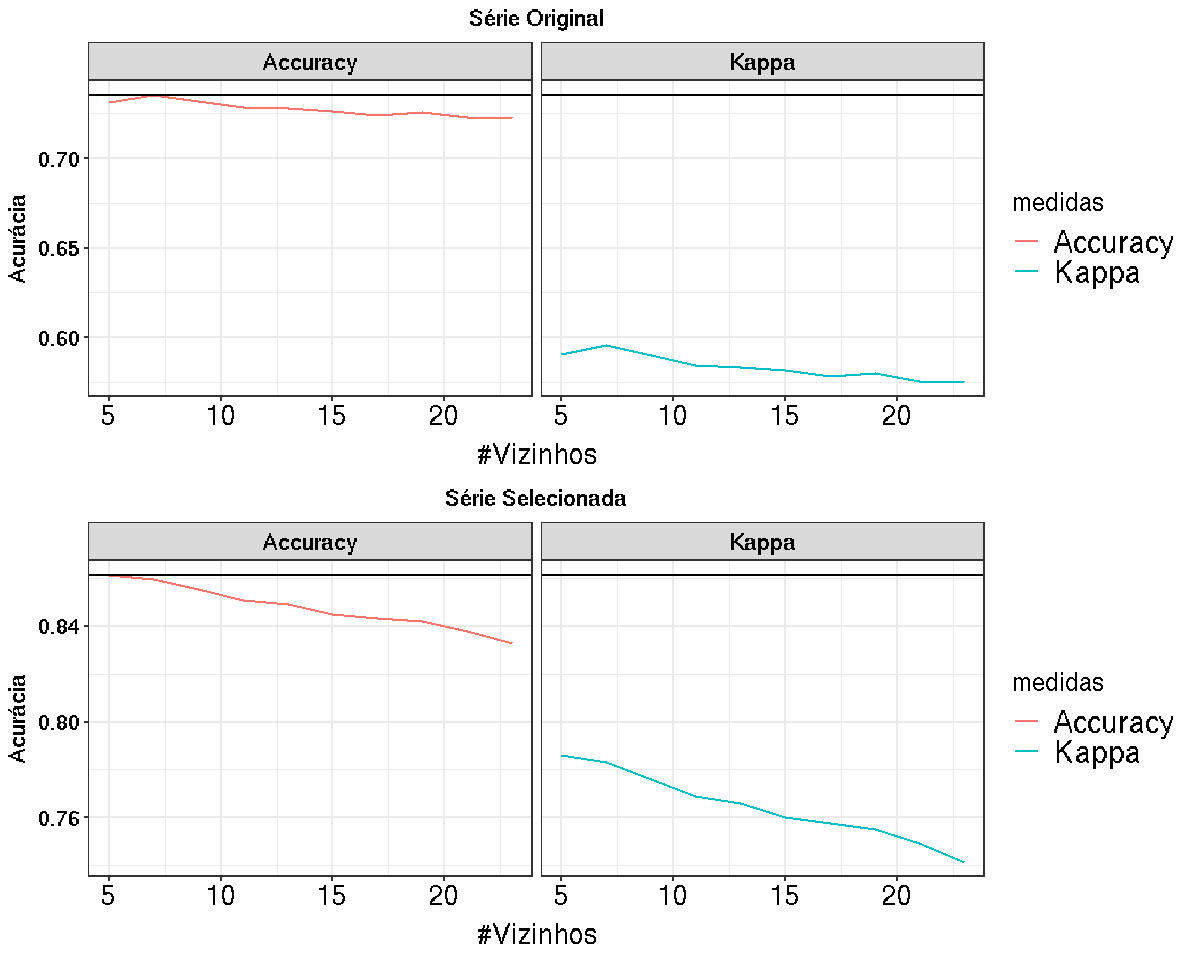

In [142]:
options(repr.plot.width=10, repr.plot.height=8)

# Transformação do conjunto de dados em long 
plot_orignal_knn <- ts_original_knn$results %>% 
    dplyr::select(k, Accuracy, Kappa) %>%
    dplyr::mutate(max_acc = max(Accuracy)) %>% 
    tidyr::gather(medidas, valor, -k, -max_acc) %>%
    plot_knn(., title = "Série Original")

# Transformação do conjunto de dados em long 
plot_clean_knn <- ts_clean_knn$results %>%
    dplyr::select(k, Accuracy, Kappa) %>%
    dplyr::mutate(max_acc = max(Accuracy)) %>% 
    tidyr::gather(medidas, valor, -k, -max_acc) %>%
    plot_knn(., title = "Série Selecionada")

grid.arrange(plot_orignal_knn, plot_clean_knn, nrow = 2, ncol = 1)

### Predição

<hr style="border: 0.5px solid #0984e3;">

#### Criação da matriz de confusão

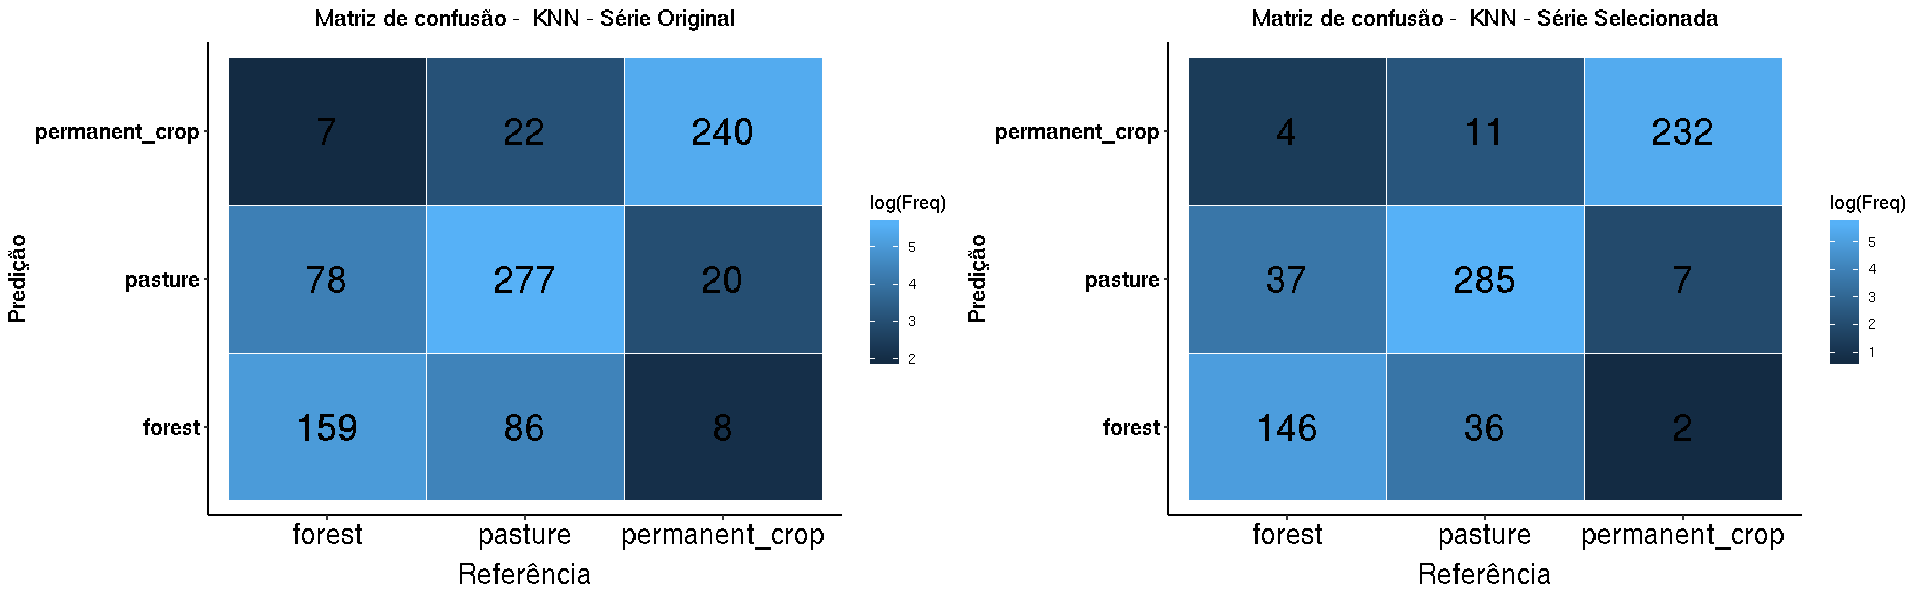

In [143]:
options(repr.plot.width=16, repr.plot.height=5)

# Predição dos valores de teste
predict_original_knn <- stats::predict(ts_original_knn, newdata = wide_original_teste[,!c("original_row")])
predict_clean_knn <- stats::predict(ts_clean_knn, newdata = wide_clean_teste[,!c("original_row")])

# Criação da matriz de confusão
cm_orignal_knn <- caret::confusionMatrix(data = predict_original_knn, 
                                         reference = as.factor(wide_original_teste$reference)) 
    
cm_clean_knn <- caret::confusionMatrix(data = predict_clean_knn,
                                       reference = as.factor(wide_clean_teste$reference)) 

# Criação dos gráficos
plot_original_knn <- cm_plot(cm_orignal_knn, model_type="KNN - Série Original")
plot_clean_knn  <- cm_plot(cm_clean_knn, model_type="KNN - Série Selecionada")

# Visualização dos gráficos
grid.arrange(plot_original_knn, plot_clean_knn, nrow = 1, ncol = 2)

#### Avaliação dos modelos

In [144]:
cat("Série original: ")
cm_clean_knn$overall
cat("\n")
cat("Série Selecionada: ")
cm_clean_knn$overall

Série original: 

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.723684e-01   8.031177e-01   8.465360e-01   8.952676e-01   4.328947e-01 
AccuracyPValue  McnemarPValue 
 5.661223e-141   6.663811e-01


Série Selecionada: 

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.723684e-01   8.031177e-01   8.465360e-01   8.952676e-01   4.328947e-01 
AccuracyPValue  McnemarPValue 
 5.661223e-141   6.663811e-01

### Árvore de decisão
<hr style="border: 0.5px solid #0984e3;">

#### Definição dos parâmetros da árvore

In [145]:
# Treino com a série temporal original
ts_original_tree <- rpart::rpart(
    formula = reference ~ .,                              # Formula de aplicação, onde (y ~ x)
    data    = wide_original_treino[,!c("original_row")],  # Conjunto de dados
    method  = "class",                                    # Métodos utilizado de classificação
    control = rpart.control(maxdepth = 10))               # Profundidade de 10 nós

# Treino com a série temporal selecionada 
ts_clean_tree <- rpart::rpart(
    formula = reference ~ .,                           # Formula de aplicação, onde (y ~ x)
    data    = wide_clean_treino[,!c("original_row")],  # Conjunto de dados
    method  = "class",                                 # Métodos utilizado de classificação
    control = rpart.control(maxdepth = 10))            # Profundidade de 10 nós

#### Visualização das informações da árvore

In [146]:
ts_original_tree

n= 2094 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 2094 1218 pasture (0.281757402 0.418338109 0.299904489)  
   2) evi10< 0.45645 1359  573 pasture (0.375275938 0.578366446 0.046357616)  
     4) ndvi2>=0.68475 679  315 forest (0.536082474 0.452135493 0.011782032)  
       8) ndvi13< 0.3536 117   15 forest (0.871794872 0.128205128 0.000000000) *
       9) ndvi13>=0.3536 562  270 pasture (0.466192171 0.519572954 0.014234875)  
        18) ndvi14>=0.40295 524  264 forest (0.496183206 0.488549618 0.015267176)  
          36) evi6< 0.39755 294  121 forest (0.588435374 0.397959184 0.013605442)  
            72) evi3>=0.3931 172   51 forest (0.703488372 0.290697674 0.005813953) *
            73) evi3< 0.3931 122   55 pasture (0.426229508 0.549180328 0.024590164) *
          37) evi6>=0.39755 230   91 pasture (0.378260870 0.604347826 0.017391304)  
            74) ndvi9>=0.77395 48   15 forest (0.687500000 0.250000000 0.062500000) *
            75) ndvi9< 0

In [147]:
ts_clean_tree

n= 1772 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1772 1006 pasture (0.241534989 0.432279910 0.326185102)  
   2) evi9< 0.53685 1222  474 pasture (0.321603928 0.612111293 0.066284779)  
     4) ndvi2>=0.68455 570  274 forest (0.519298246 0.450877193 0.029824561)  
       8) evi5< 0.4475 393  131 forest (0.666666667 0.312977099 0.020356234)  
        16) ndvi7< 0.62975 204   29 forest (0.857843137 0.137254902 0.004901961)  
          32) evi5>=0.3482 180   11 forest (0.938888889 0.055555556 0.005555556) *
          33) evi5< 0.3482 24    6 pasture (0.250000000 0.750000000 0.000000000) *
        17) ndvi7>=0.62975 189   94 pasture (0.460317460 0.502645503 0.037037037)  
          34) evi9>=0.2974 144   64 forest (0.555555556 0.395833333 0.048611111)  
            68) ndvi1< 0.7841 104   36 forest (0.653846154 0.278846154 0.067307692) *
            69) ndvi1>=0.7841 40   12 pasture (0.300000000 0.700000000 0.000000000) *
          35) evi9< 0.2974 45  

#### Visualização da árvore por classe

Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”

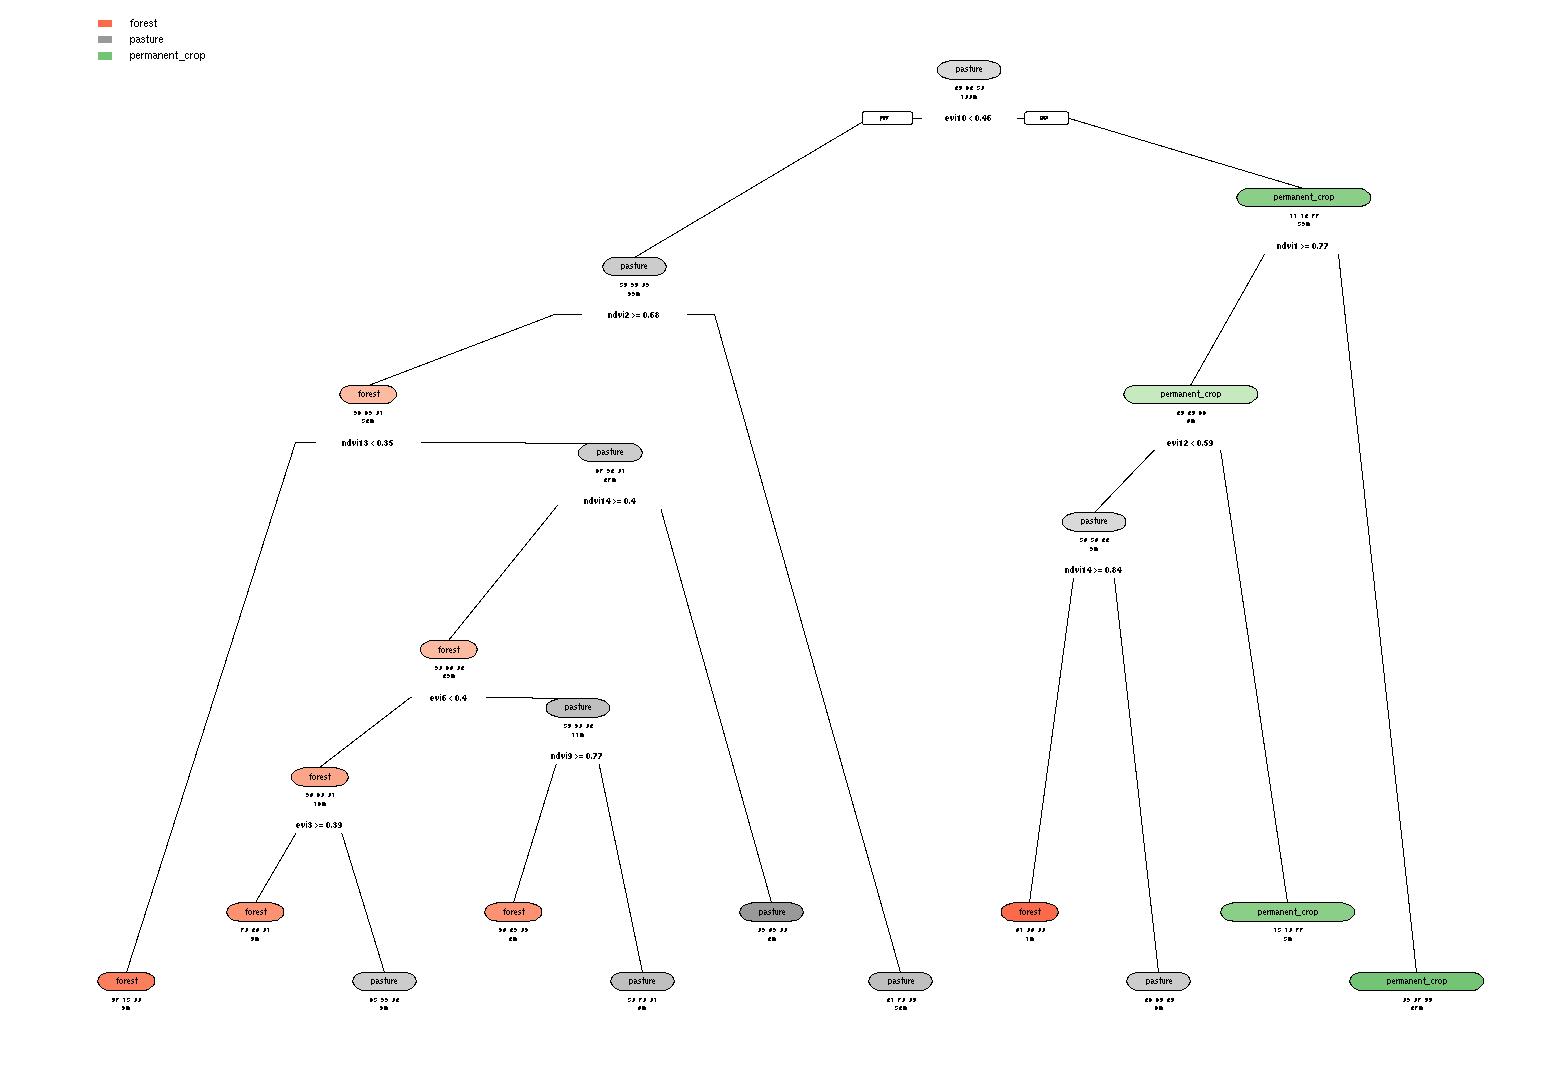

In [149]:
options(repr.plot.width=13, repr.plot.height=9)

rpart.plot::rpart.plot(ts_original_tree, clip.right.labs = FALSE, branch = .3, under = TRUE, )

Warning message:
“Bad 'data' field in model 'call' (expected a data.frame or a matrix).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”

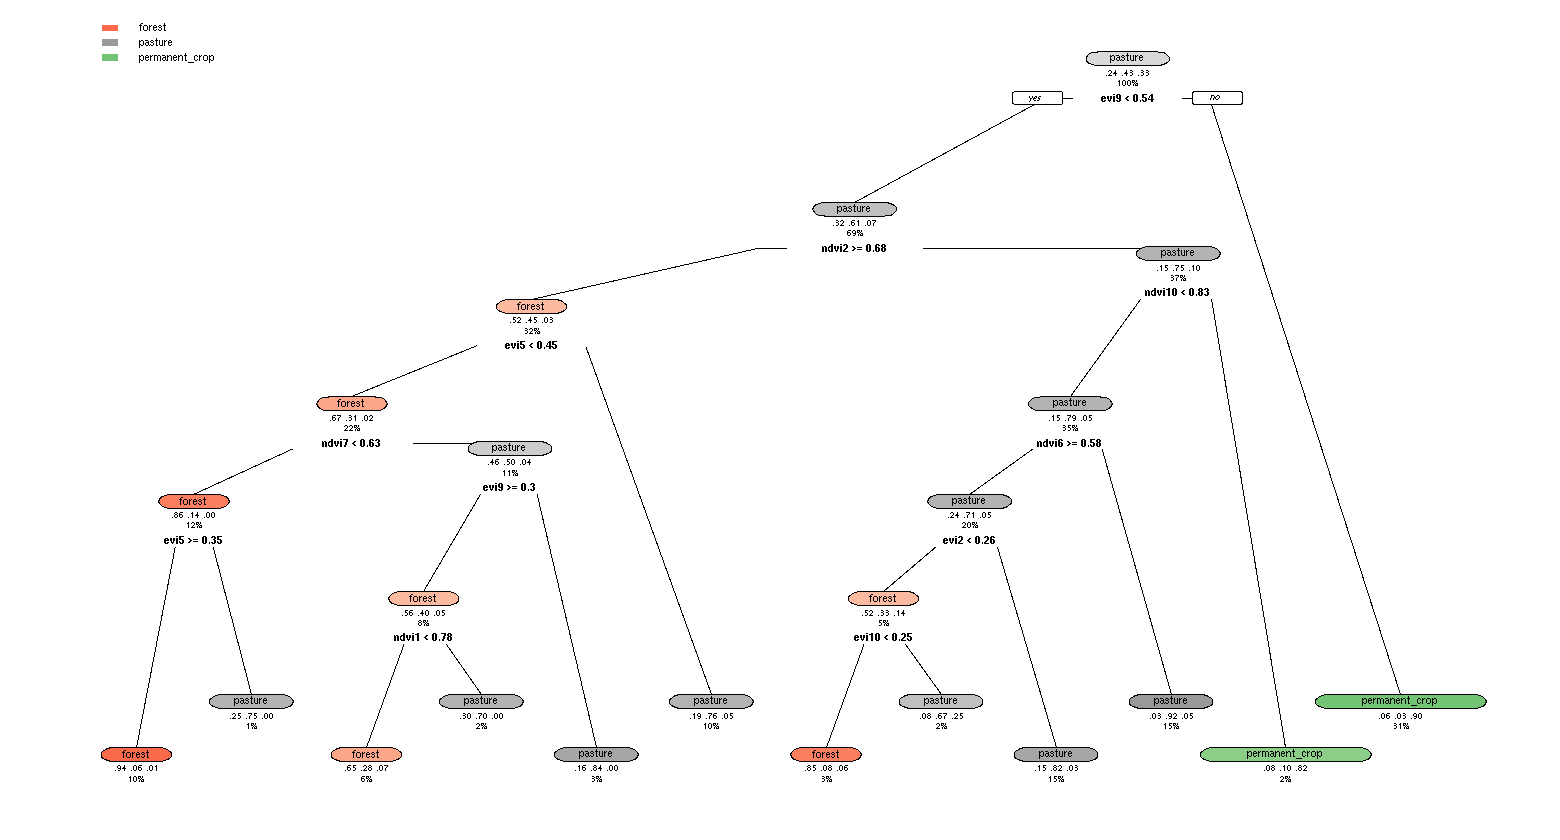

In [150]:
options(repr.plot.width=13, repr.plot.height=7)

rpart.plot::rpart.plot(ts_clean_tree, clip.right.labs = FALSE, branch = .3, under = TRUE, )

### Predição

<hr style="border: 0.5px solid #0984e3;">

#### Criação da matriz de confusão

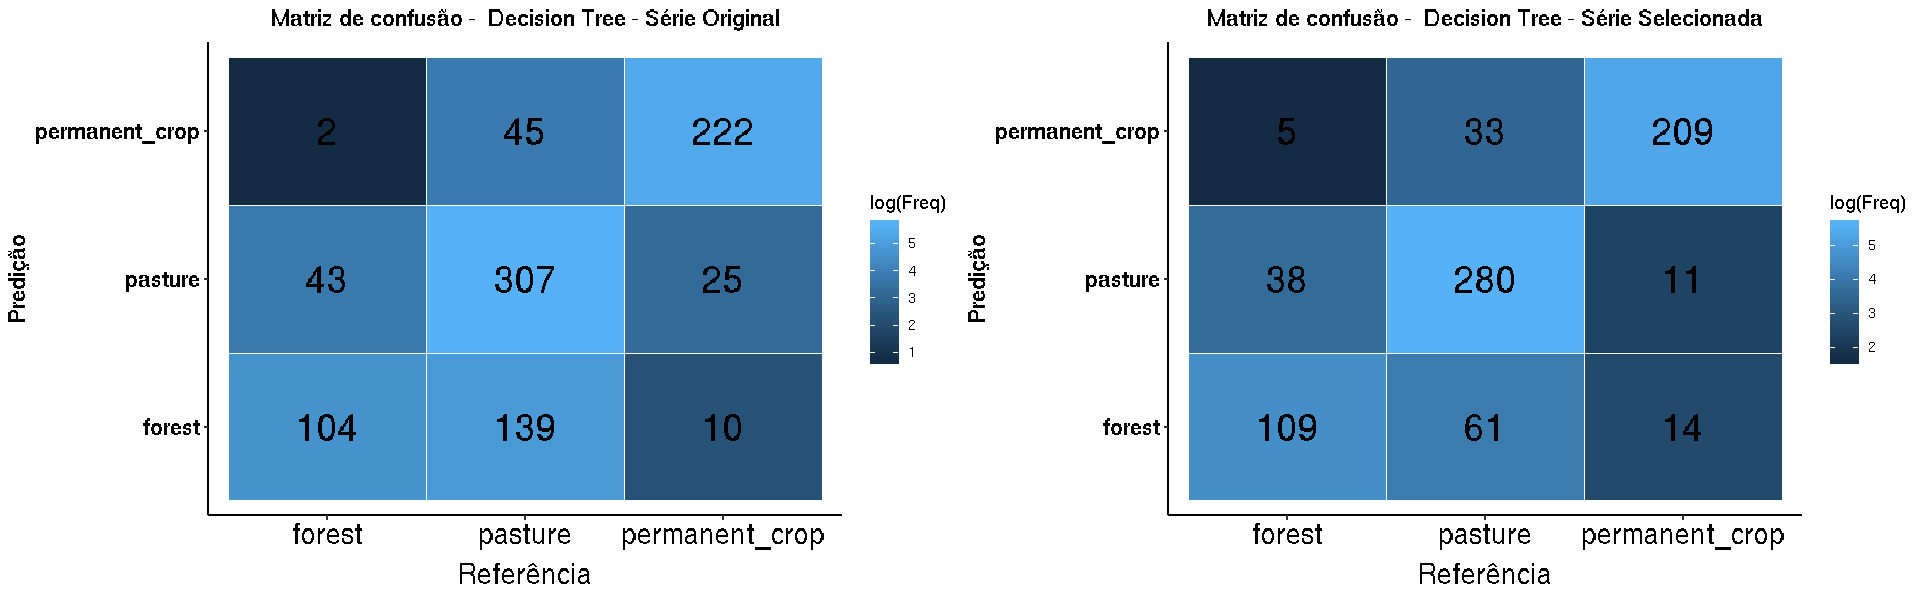

In [151]:
options(repr.plot.width=16, repr.plot.height=5)

# Predição do conjunto de teste
predict_original_tree <- stats::predict(ts_original_tree, wide_original_teste[,!c("original_row")], type = "class")
predict_clean_tree    <- stats::predict(ts_clean_tree, wide_clean_teste[,!c("original_row")], type = "class")

# Criação da matriz de confusão
cm_original_tree <- caret::confusionMatrix(data      = predict_original_tree, 
                                           reference = as.factor(wide_original_teste$reference))

cm_clean_tree    <- caret::confusionMatrix(data      = predict_clean_tree,
                                           reference = as.factor(wide_clean_teste$reference))
# Criação dos gráficos
plot_original_tree <- cm_plot(cm_original_tree, model_type = "Decision Tree - Série Original")
plot_clean_tree    <- cm_plot(cm_clean_tree, model_type    = "Decision Tree - Série Selecionada")

# Visualização dos gráficos
grid.arrange(plot_original_tree, plot_clean_tree, nrow = 1, ncol = 2)

#### Avaliação dos modelos

In [152]:
cat("Série original: ")
cm_original_tree$overall
cat("\n")
cat("Série Selecionada: ")
cm_clean_tree$overall

Série original: 

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.056856e-01   5.389737e-01   6.746631e-01   7.353504e-01   4.180602e-01 
AccuracyPValue  McnemarPValue 
  7.151835e-68   2.565565e-13


Série Selecionada: 

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.868421e-01   6.661497e-01   7.559820e-01   8.154570e-01   4.328947e-01 
AccuracyPValue  McnemarPValue 
  2.031850e-88   1.270569e-04

### Redes neurais

<hr style="border: 0.5px solid #0984e3;">

#### Criação do conjunto de treino e teste

In [153]:
# Preparação do conjunto do dados para o uso do pacote keras
timeseries_original_rnn <- sits::sits_dl_prepare_data(timeseries_forest_select, type = "MLP")
timeseries_clean_rnn    <- sits::sits_dl_prepare_data(sits_clean_som_20_20_batch, type = "MLP")

# Transformação do atributo categórico em one-hot coding
timeseries_original_rnn$train_y <- keras::to_categorical(timeseries_original_rnn$train.y)
timeseries_original_rnn$test_y  <- keras::to_categorical(timeseries_original_rnn$test.y)

timeseries_clean_rnn$train_y <- keras::to_categorical(timeseries_clean_rnn$train.y)
timeseries_clean_rnn$test_y  <- keras::to_categorical(timeseries_clean_rnn$test.y)

#### Definição dos hiperparâmetros do modelo

In [154]:
# Definição da arquitetura do modelo com a série temporal original
ts_original_arch <- keras::keras_model_sequential() %>%
    keras::layer_dense(units = 4, activation = "relu", input_shape = ncol(timeseries_original_rnn$train.x)) %>%
    keras::layer_dense(units = 10, activation = "relu") %>%
    keras::layer_dense(units = 20, activation = "relu") %>%
    keras::layer_dense(units = 3, activation = "softmax") %>%
    keras::compile( # Compilação do modelo
        optimizer = "rmsprop", 
        loss = "categorical_crossentropy", 
        metrics = c("accuracy"))


# Criação do modelo da série original
ts_original_model <- keras::fit(
    ts_original_arch, 
    timeseries_original_rnn$train.x,
    timeseries_original_rnn$train_y,
    epochs = 100,
    validation_split = 0.2)

ts_original_model

Trained on 1,914 samples (batch_size=32, epochs=100)
Final epoch (plot to see history):
    accuracy: 0.721
val_accuracy: 0.7223
        loss: 0.5919
    val_loss: 0.5995 

In [155]:
# Definição da arquitetura do modelo com a série temporal selecionada
ts_clean_arch <- keras::keras_model_sequential() %>%
    keras::layer_dense(units = 4, activation = "relu", input_shape = ncol(timeseries_clean_rnn$train.x)) %>%
    keras::layer_dense(units = 10, activation = "relu") %>%
    keras::layer_dense(units = 20, activation = "relu") %>%
    keras::layer_dense(units = 3, activation = "softmax") %>%
    keras::compile( # Compilação do modelo
        optimizer = "rmsprop", 
        loss = "categorical_crossentropy", 
        metrics = c("accuracy"))


  
# Criação do modelo
ts_clean_model <- keras::fit(
    ts_clean_arch, 
    timeseries_clean_rnn$train.x,
    timeseries_clean_rnn$train_y,
    epochs = 100,
    validation_split = 0.2)

ts_clean_model

Trained on 1,620 samples (batch_size=32, epochs=100)
Final epoch (plot to see history):
    accuracy: 0.8037
val_accuracy: 0.798
        loss: 0.4403
    val_loss: 0.4593 

O modelo de rede neural criado possui 4 camadas, sendo elas:
   - 1° Camada: Entrada dos dados;
   - 2° Camada: Camada oculta;
   - 3° Camada: Camada oculta;
   - 4° Camada: Camada de saída (Classificação).

#### Visualização do gráfico de perda e de acurácia

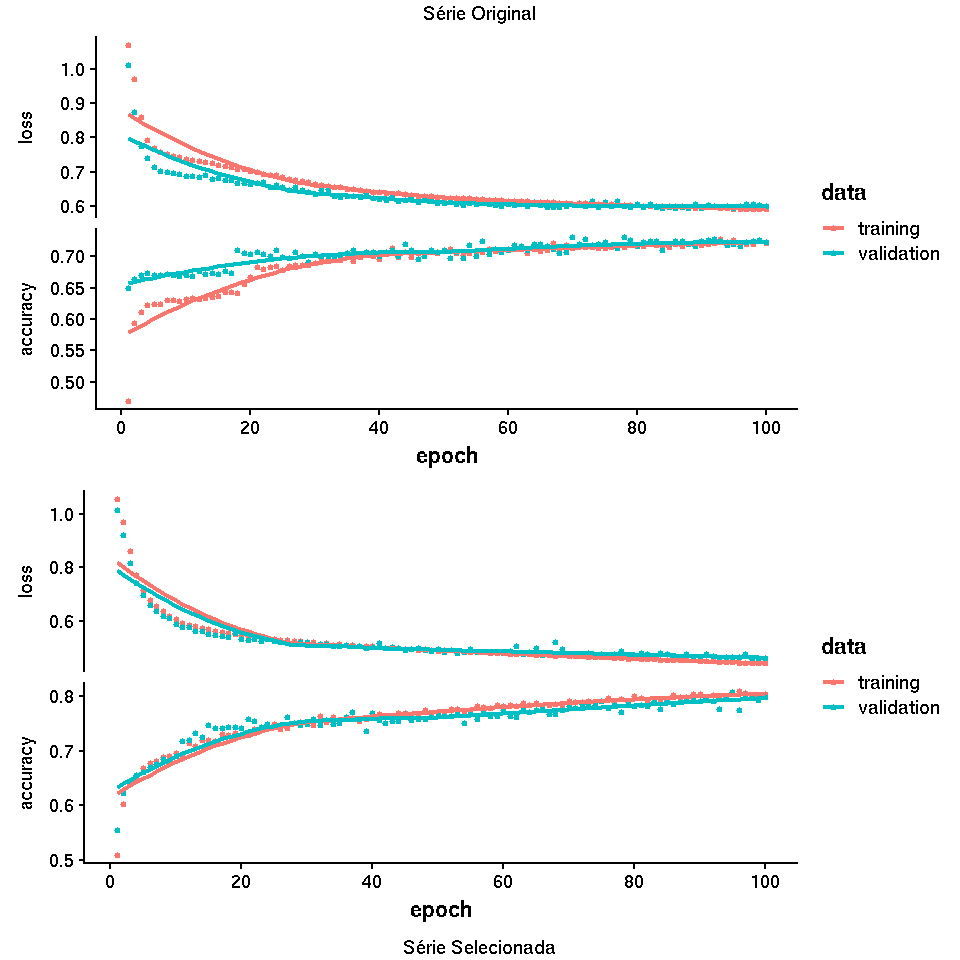

In [156]:
options(repr.plot.width=8, repr.plot.height=8)

plot_original_rnn <- plot(ts_original_model)
plot_clean_rnn    <- plot(ts_clean_model)

# Visualização dos gráficos
grid.arrange(plot_original_rnn, plot_clean_rnn, nrow = 2, ncol = 1, top= "Série Original", bottom="Série Selecionada")

### Predição
<hr style="border: 0.5px solid #0984e3;">

#### Criação da matriz de confusão

In [157]:
# Comentar aqui
predict_original_rnn <- keras::predict_classes(object = ts_original_arch, x = timeseries_original_rnn$test.x) 
predict_clean_rnn    <- keras::predict_classes(object = ts_clean_arch, x = timeseries_clean_rnn$test.x)

# Mapeando os atributos
timeseries_original_rnn$test.y <- timeseries_original_rnn$test.y %>% as.character() %>% as.factor() %>% 
    plyr::mapvalues(., from = c("0", "1", "2"), to=c("forest", "permanent_crop", "pasture")) %>%
    factor(., levels = c("forest", "permanent_crop", "pasture"))

timeseries_clean_rnn$test.y <- timeseries_clean_rnn$test.y %>% as.character() %>% as.factor() %>% 
    plyr::mapvalues(., from = c("0", "1", "2"), to=c("forest", "permanent_crop", "pasture")) %>%
    factor(., levels = c("forest", "permanent_crop", "pasture"))

predict_original_rnn <- predict_original_rnn %>% as.character() %>% as.factor() %>% 
    plyr::mapvalues(., from = c("0", "1", "2"), to=c("forest", "permanent_crop", "pasture")) %>%
    factor(., levels = c("forest", "permanent_crop", "pasture"))

predict_clean_rnn   <- predict_clean_rnn %>% as.character() %>% as.factor() %>% 
    plyr::mapvalues(., from = c("0", "1", "2"), to=c("forest", "permanent_crop", "pasture")) %>%
    factor(., levels = c("forest", "permanent_crop", "pasture"))

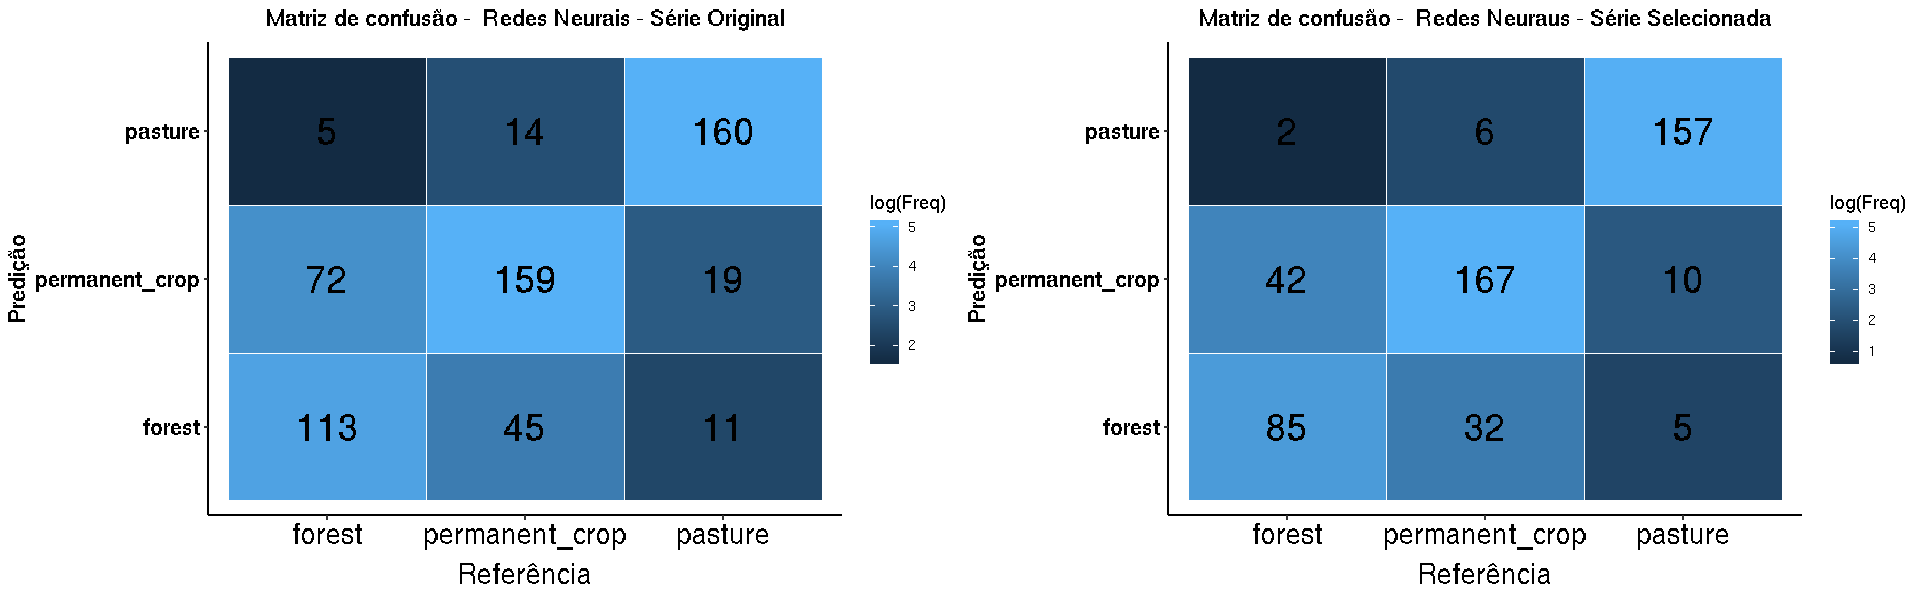

In [158]:
options(repr.plot.width=16, repr.plot.height=5)

# Mapeando os atributos
cm_original_rnn <- 
    caret::confusionMatrix(data = predict_original_rnn, reference = timeseries_original_rnn$test.y)

cm_clean_rnn <- 
    caret::confusionMatrix(data = predict_clean_rnn, reference = timeseries_clean_rnn$test.y)


# Criação dos gráficos
plot_original_rnn <- cm_plot(cm_original_rnn, model_type = "Redes Neurais - Série Original")
plot_clean_rnn    <- cm_plot(cm_clean_rnn, model_type    = "Redes Neuraus - Série Selecionada")

# Visualização dos gráficos
grid.arrange(plot_original_rnn, plot_clean_rnn, nrow = 1, ncol = 2)

#### Avaliação dos modelos

In [159]:
cat("Série original: ")
cm_original_rnn$overall
cat("\n")
cat("Série Selecionada: ")
cm_clean_rnn$overall

Série original: 

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  7.224080e-01   5.811194e-01   6.846408e-01   7.579621e-01   4.180602e-01 
AccuracyPValue  McnemarPValue 
  2.792110e-51   2.628420e-02


Série Selecionada: 

Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
  8.083004e-01   7.061363e-01   7.712504e-01   8.417014e-01   4.328063e-01 
AccuracyPValue  McnemarPValue 
  3.048209e-67   3.034154e-01

## Avaliação dos Modelos

<hr style="border: 0.5px solid #0984e3;">

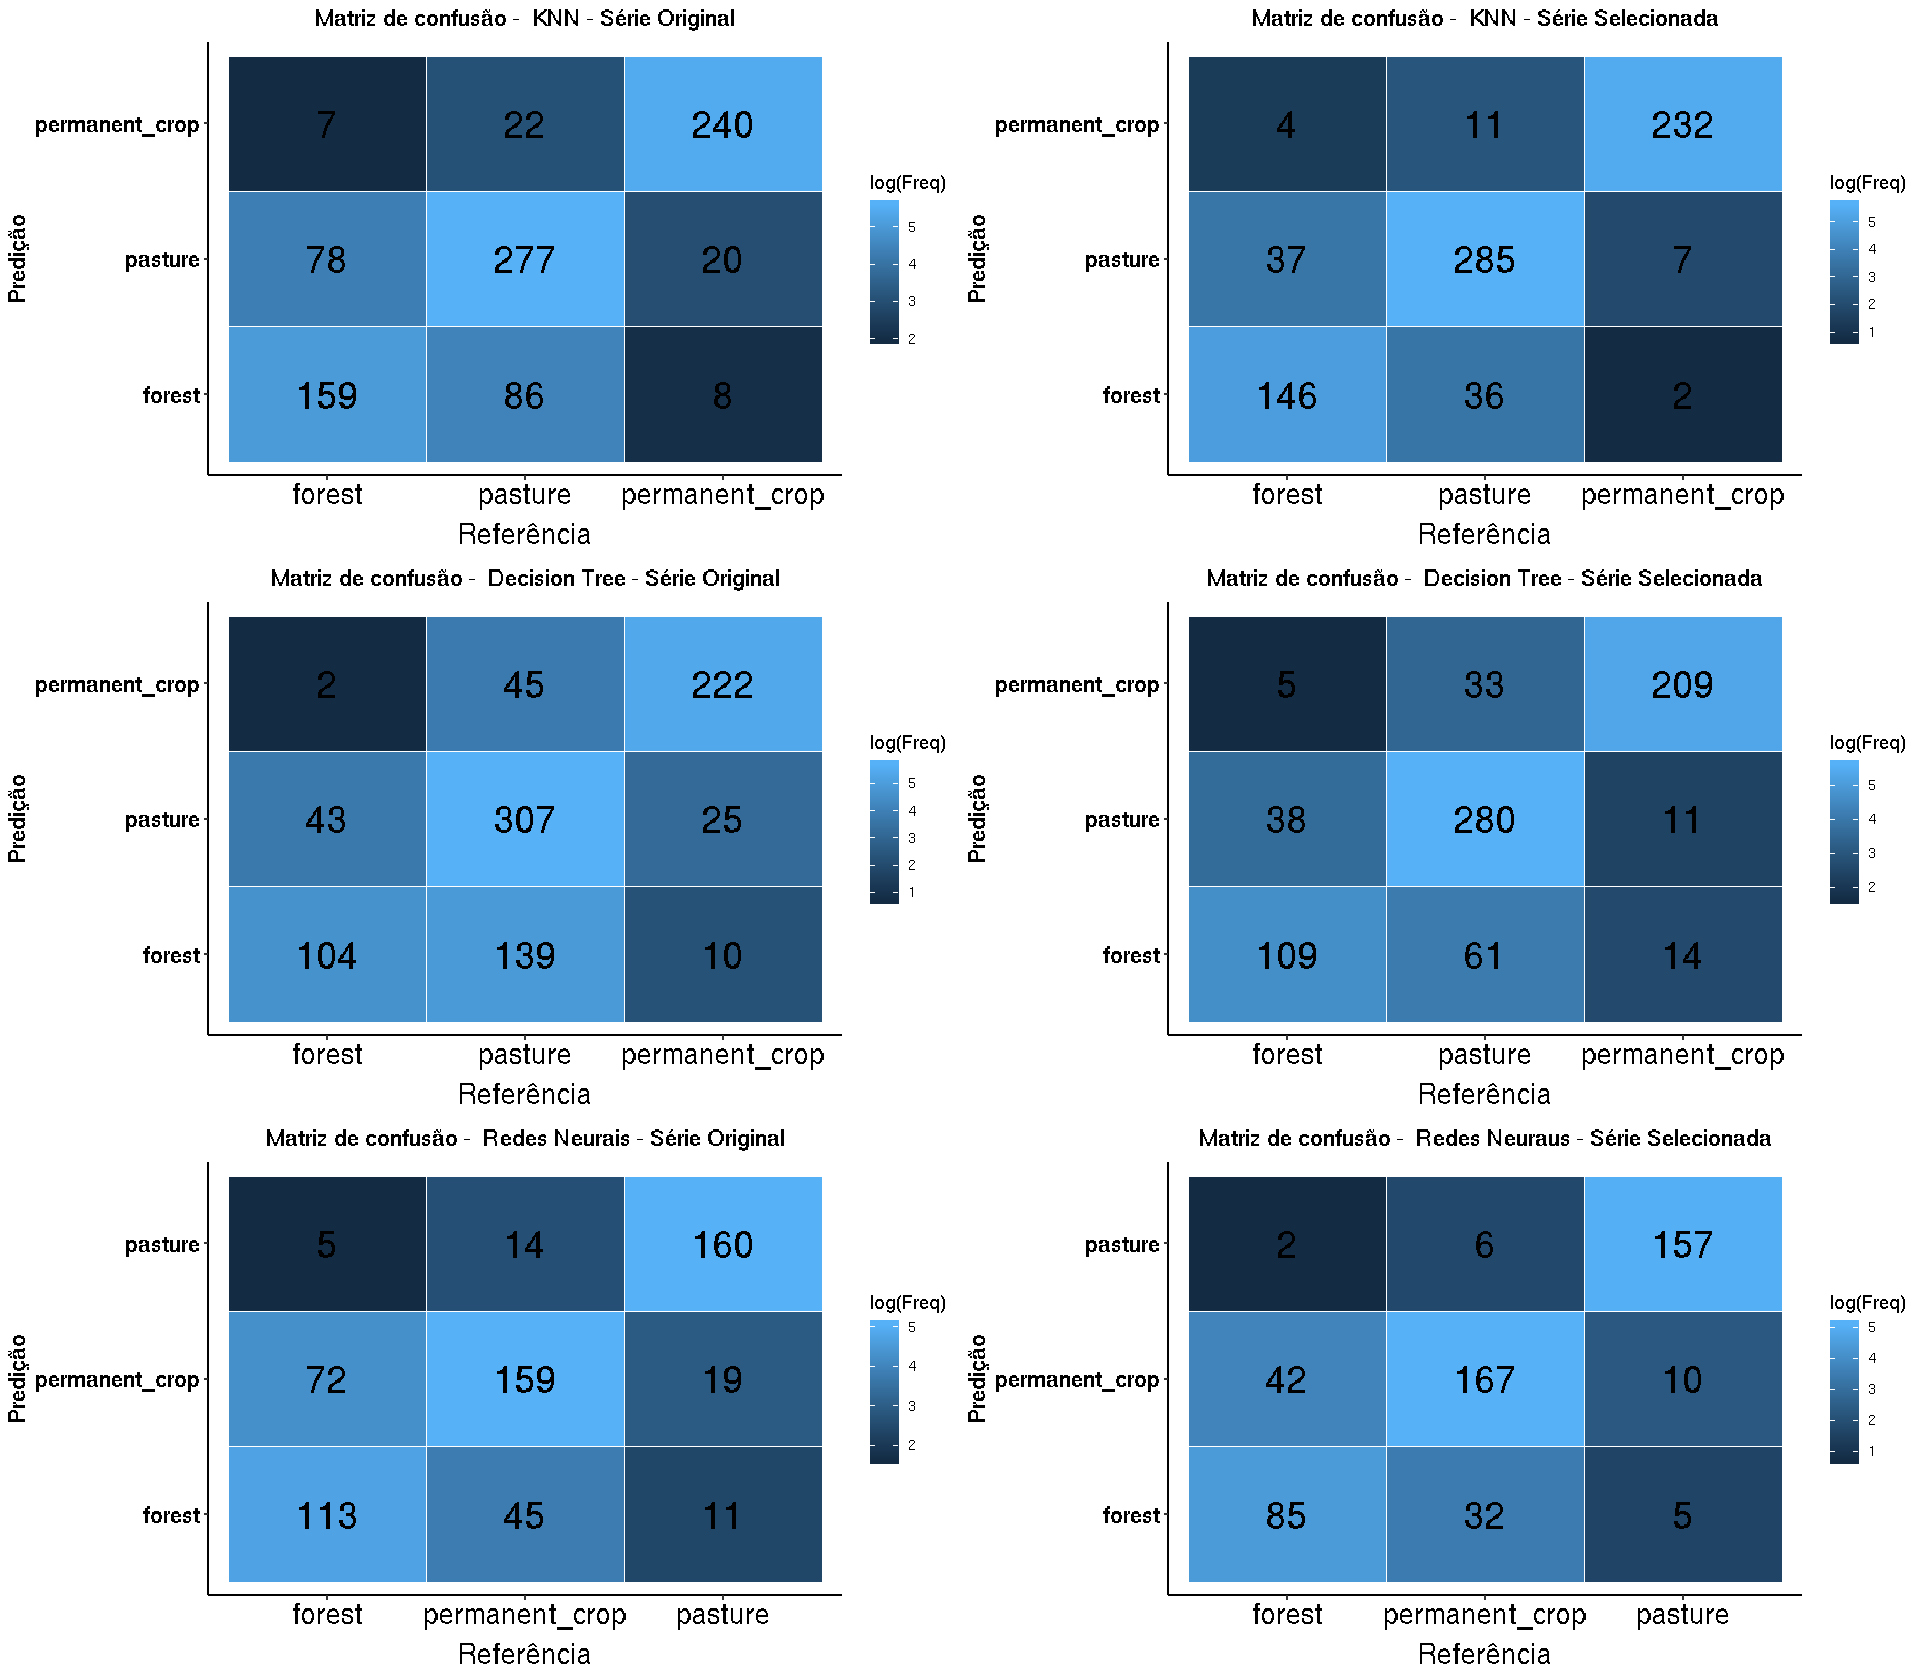

In [164]:
options(repr.plot.width=16, repr.plot.height=14)

grid.arrange(plot_original_knn, plot_clean_knn, 
             plot_original_tree, plot_clean_tree, 
             plot_original_rnn, plot_clean_rnn, 
             nrow = 3, ncol = 2)

# Conclusão

<hr style="border: 0.5px solid #0984e3;">

Neste trabalho foi apresentado o uso do algoritmo de Mapas Auto-organizáveis para a seleção de amostras de uso e cobertura do solo, no qual aplica-se a técnica de voto majoritário, onde é definido à priori um limiar de probabilidade para alterar o rótulo de cada neurônio. Através do método de seleção de amostras foi possível extrair diversas informações, tais quais às possíveis confusões espectro-temporais entre cada amostra, e, de forma quantitativa, aumentar a acurácia da classificação em $10\%$ em todos os modelos.  

Uma abordagem interessante para explorar em trabalho futuros para identificar *macro-clusters* no SOM é o uso do algoritmo de agrupamento hierárquico.  Outra abordagem interessante é uso dos algoritmos variantes do SOM, por exemplo, *Growing Neural Gas* e *Growing Self-Organizing Maps* por sua características de crescimento automática, sem a necessidade de estabelecer uma grade fixa.

# Referências
<hr style="border: 0.5px solid #0984e3;">

[1] Giuliani, G., Chatenoux, B., De Bono, A., Rodila, D., Richard, J.-P., Allenbach, K., Dao, H., and Peduzzi, P. (2017). Building an earth observations data cube: lessons learned from the swiss data cube (sdc) on generating analysis ready data (ard). Big Earth Data, 1(1-2):100–117.

[2] Yang, H., Li, S., Chen, J., Zhang, X., and Xu, S. (2017). The standardization and harmonization of land cover classification systems towards harmonized datasets: a review. ISPRS International Journal of Geo-Information, 6(5):154.

[3] Appel, M. and Pebesma, E. (2019). On-demand processing of data cubes from satellite image collections with the gdalcubes library. Data, 4(3):92.

[4] Lu, M., Appel, M., and Pebesma, E. (2018). Multidimensional arrays for analysing geoscientific data. ISPRS International Journal of Geo-Information, 7(8):313.

[5] Lewis, A., Oliver, S., Lymburner, L., Evans, B., Wyborn, L., Mueller, N., Raevksi, G., Hooke, J., Woodcock, R., Sixsmith, J., et al. (2017). The australian geoscience data cube foundations and lessons learned. Remote Sensing of Environment, 202:276–292

[6] Santos, L., Ferreira, K. R., Picoli, M., and Camara, G. (2019). Self-organizing maps in earth observation data cubes analysis. In International Workshop on Self-Organizing Maps, pages 70–79. Springer.

[7] Wehrens, R., Buydens, L. M., et al. (2007). Self-and super-organizing maps in r: the kohonen package. Journal of Statistical Software, 21(5):1–19.

[8] Simoes, R., Camara, G., Andrade, P., de Carvalho, A. Y., Santos, L., Ferreira, K., Maus, V., and Queiroz, G. (2019). SITS: Data Analysis and Machine Learning using Satellite Image Time Series. INPE - Brazilian National Institute for Space Research, Sao Jose dos Campos, Brazil.

[9] Ibge (2013). Manual técnico de uso da terra, volume 3. IBGE.